In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv("../1_House_Price_Project_X/train.csv")
test = pd.read_csv("../1_House_Price_Project_X/test.csv")

## 1.EDA

### 1) Introduction

In [3]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1455         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1456         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    ...            0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1459         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [5]:
test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
1454         Lvl    AllPub      ...                 0        0    NaN    NaN   
1455         Lvl    AllPub      ...                 0        0    NaN    NaN   
1456         Lvl    AllPub      ...                 0        0    NaN    NaN   
1457         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
1458         Lvl    AllPub      ...                 0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[5 rows x 80 columns]

In [6]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [7]:
print(len(train.columns), train.columns)

81 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDr

In [8]:
print(len(test.columns), test.columns)

80 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDr

In [9]:
numberic_features = []
categoric_features = []
for f in train.columns:
    if train.dtypes[f] != 'object':
        numberic_features.append(f)
    else:
        categoric_features.append(f)

In [10]:
print(len(numberic_features), numberic_features)
print(len(categoric_features), categoric_features)

38 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
43 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',

In [11]:
numberic_features.remove("Id")
numberic_features.remove("SalePrice")
len(numberic_features), numberic_features

(36,
 ['MSSubClass',
  'LotFrontage',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold'])

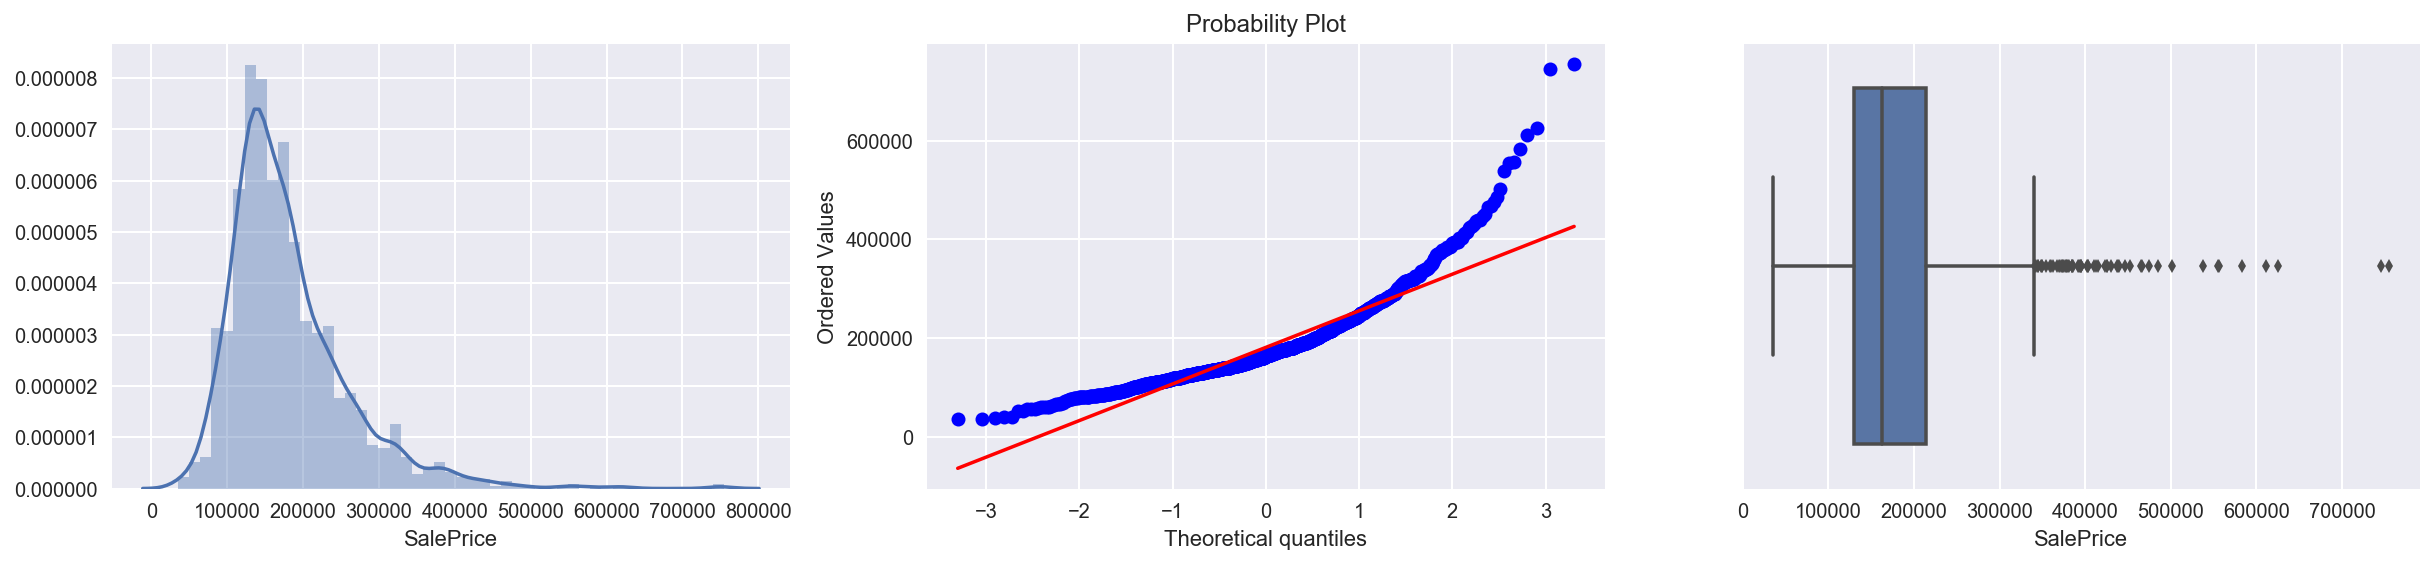

In [12]:
plt.figure(figsize=(17,4))

plt.subplot(131)
train["SalePrice"].describe()
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

In [13]:
#아웃라이어 갯수 표시 필요

def detect_outliers(data, feature):
    outlier_list = []
    
    Q1 = np.percentile(data[feature], 25)
    Q3 = np.percentile(data[feature], 75)
    IQR = Q3 - Q1
        
    outlier_lenth = 1.5 * IQR
        
    outliers = data[(data[feature] < Q1 - outlier_lenth) | (data[feature] > Q3 + outlier_lenth)].index
    
    outlier_list.append(outliers)

    return outlier_list   

In [18]:
Saleprice_outlier = detect_outliers(train, "SalePrice")
Saleprice_outlier

[Int64Index([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
              309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
              481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
              664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
              877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
             1267, 1268, 1353, 1373, 1388, 1437],
            dtype='int64')]

In [19]:
train=train.drop(train.index[Saleprice_outlier]).reset_index(drop=True)
train.shape

(1399, 81)

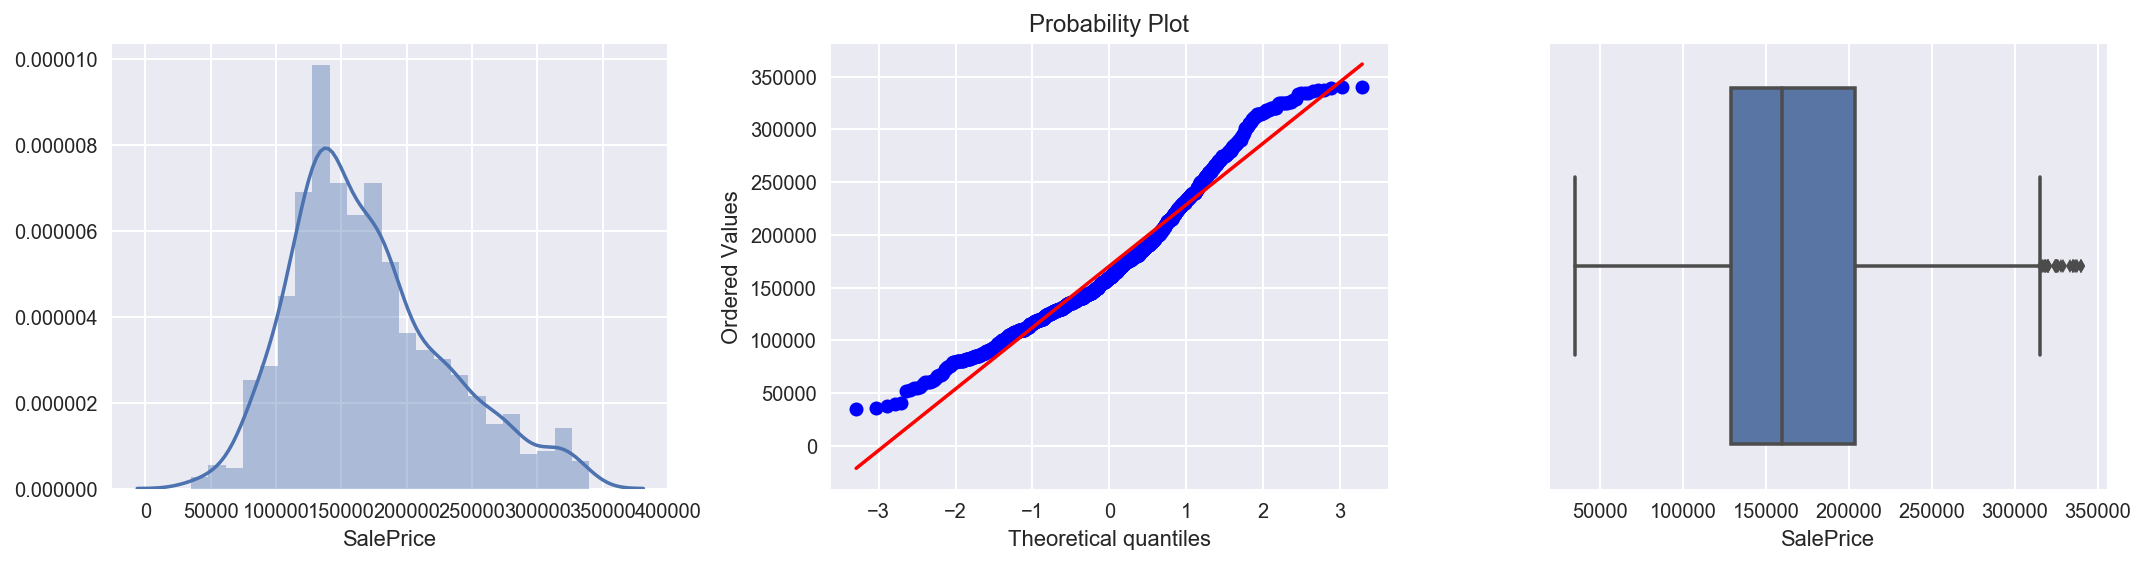

In [20]:
plt.figure(figsize = (15,4))
    
plt.subplot(131)
# train["SalePrice"].describe()
sns.distplot(train["SalePrice"])

plt.subplot(132)
stats.probplot(train["SalePrice"], plot=plt)

plt.subplot(133)
sns.boxplot(train["SalePrice"])
plt.tight_layout()
plt.show()

### 2) 변수들 간의 관계

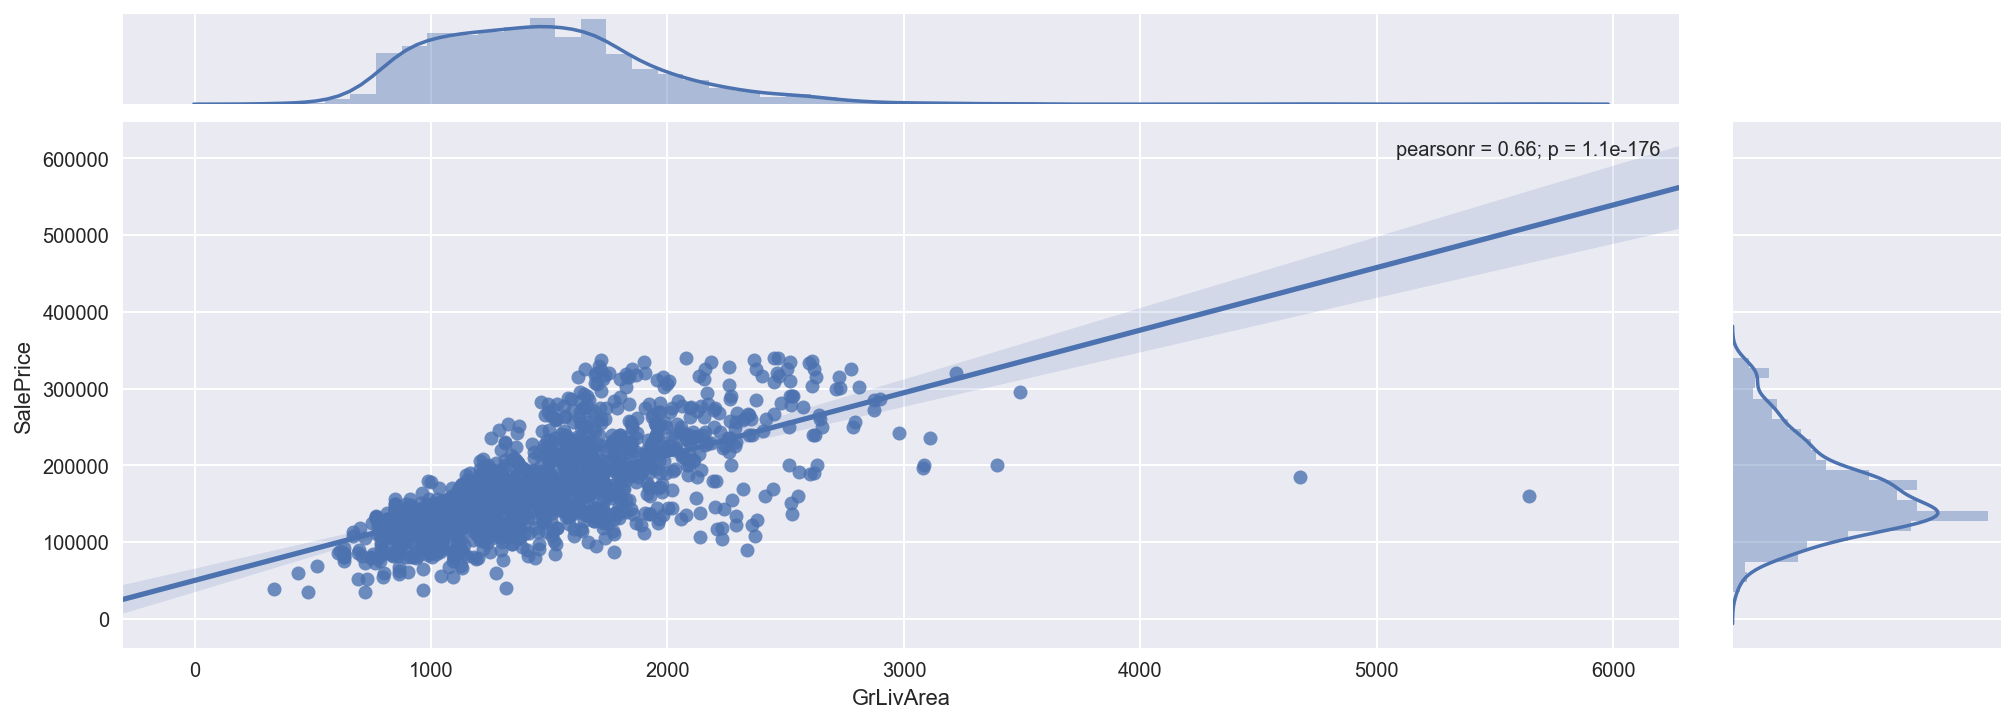

In [21]:
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind="reg")
grid.fig.set_size_inches(15,5)
plt.show()

In [22]:
df_train = train.copy()
df_train["2ndFloor"] = "2ndFloor"
df_train["2ndFloor"].loc[df_train["2ndFlrSF"]==0] = "No 2ndFloor"
df_train["Basement"] = "Basement"
df_train["Basement"].loc[df_train["TotalBsmtSF"]==0] = "No Basement"

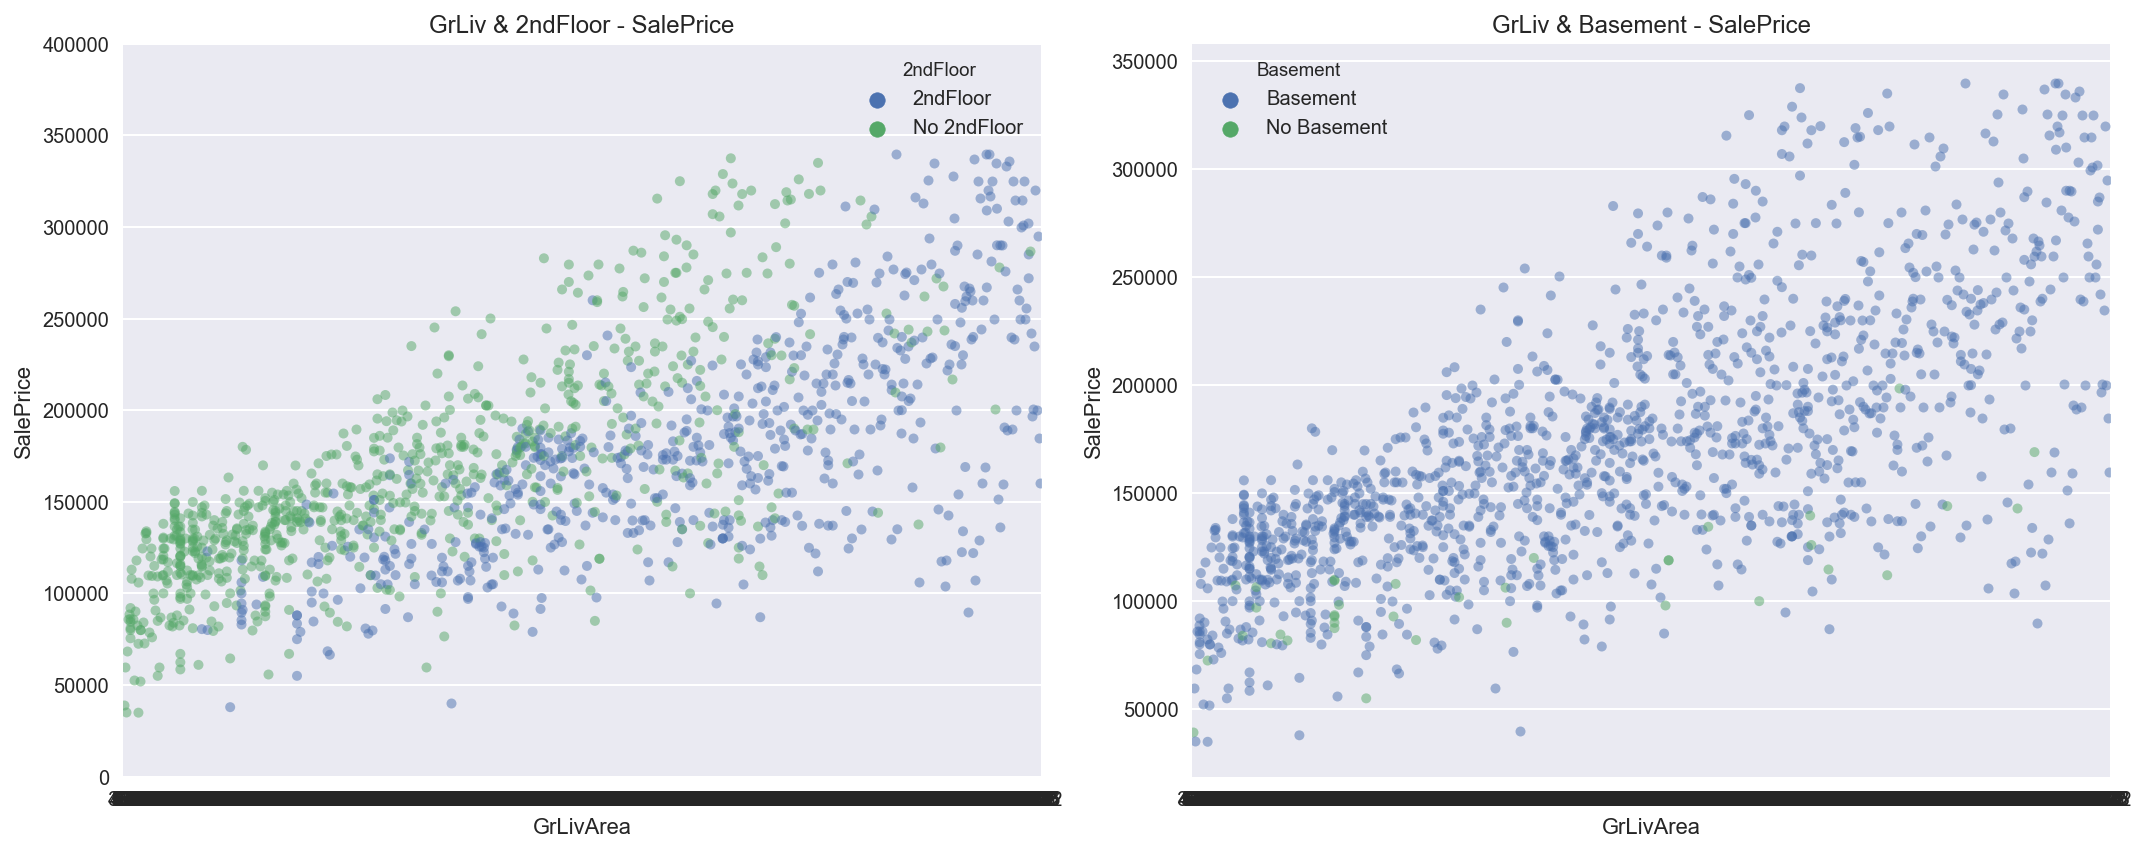

In [23]:
plt.figure(figsize = (15,6))

plt.subplot(121)
g = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "2ndFloor", data = df_train, alpha = 0.5)
g.set_xlabel('GrLivArea')
g.set_ylabel('SalePrice')
g.set_ylim(0,400000)
g.set_title('GrLiv & 2ndFloor - SalePrice')

plt.subplot(122)
b = sns.stripplot( x = "GrLivArea", y = 'SalePrice', hue = "Basement", data = df_train, alpha = 0.5)
b.set_xlabel('GrLivArea')
b.set_ylabel('SalePrice')
g.set_ylim(0,400000)
g.set_title('GrLivArea & Basement - SalePrice')

plt.show()

In [24]:
GrLivArea_outlier = detect_outliers(train, "GrLivArea")
GrLivArea_outlier

[Int64Index([ 114,  182,  189,  293,  305,  307,  309,  498,  557,  606,  706,
              815,  915,  976,  983, 1122, 1124, 1241, 1255, 1271, 1327],
            dtype='int64')]

In [25]:
train=train.drop(train.index[GrLivArea_outlier], axis=0).reset_index(drop=True)
train.shape

(1378, 81)

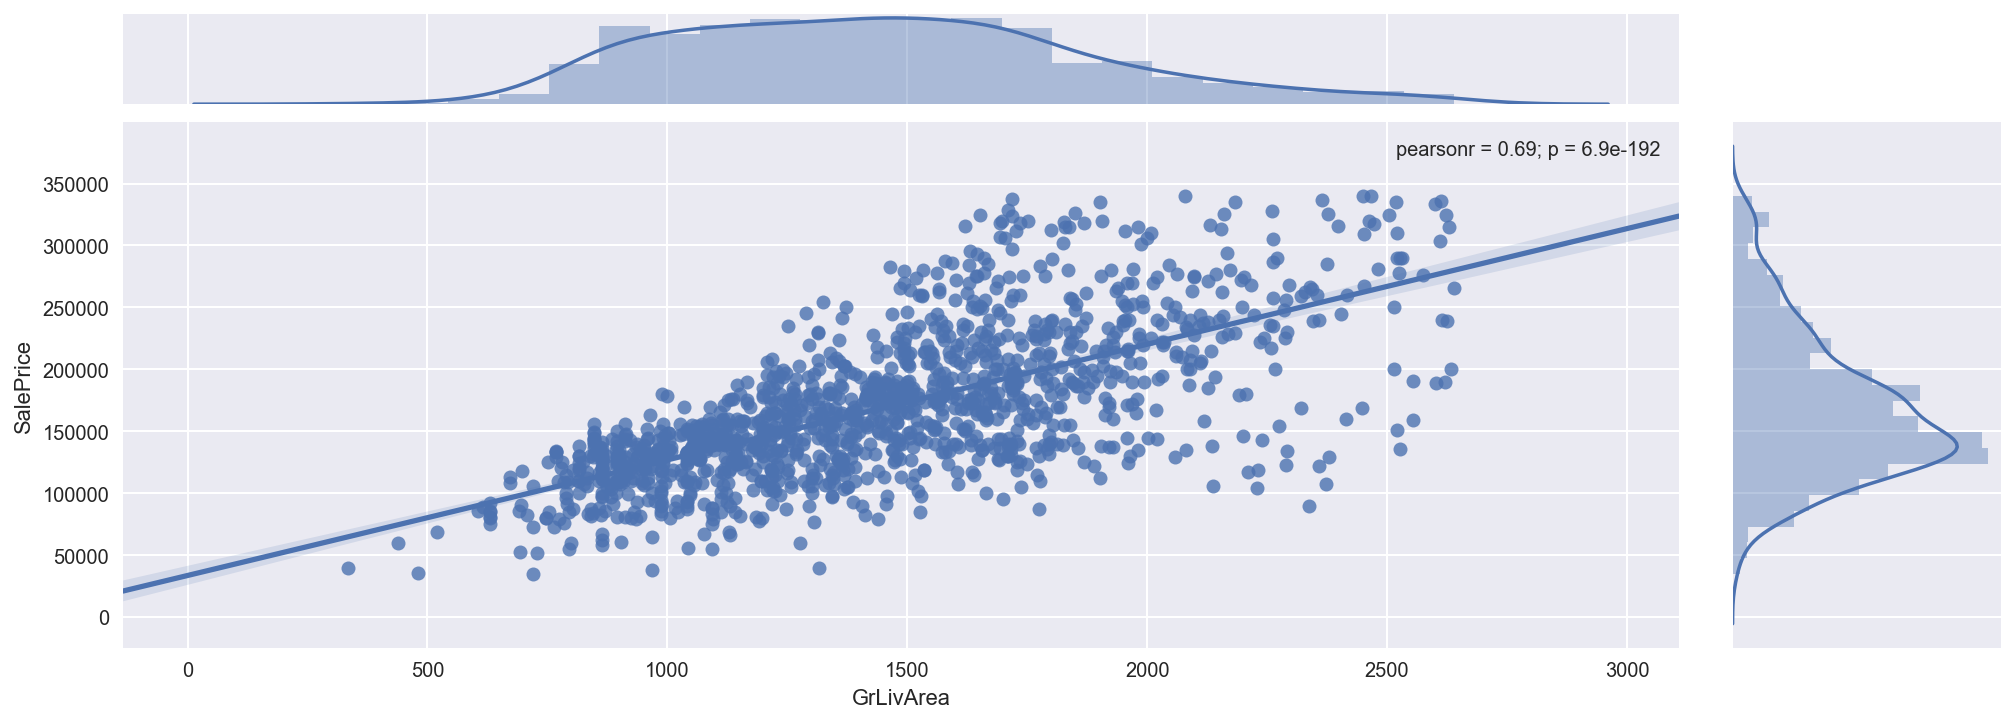

In [26]:
grid = sns.jointplot(x = "GrLivArea", y = "SalePrice", data=train, kind ="reg")
grid.fig.set_size_inches(15,5)
grid.set_title('GrLivArea - SalePrice')
plt.show()

Find : 1. Grliv 넓이가 중간 아래부분까지는 같은 넓이의 집은 2층보다 1층집의 값 더 비싼것을 알수 있었다
       2. 베이스먼트가 없는집은 거의 없으며, 집값에는 영향이 없는것 같다 

Text(0.5,1,'OverallCond - SalePrice')

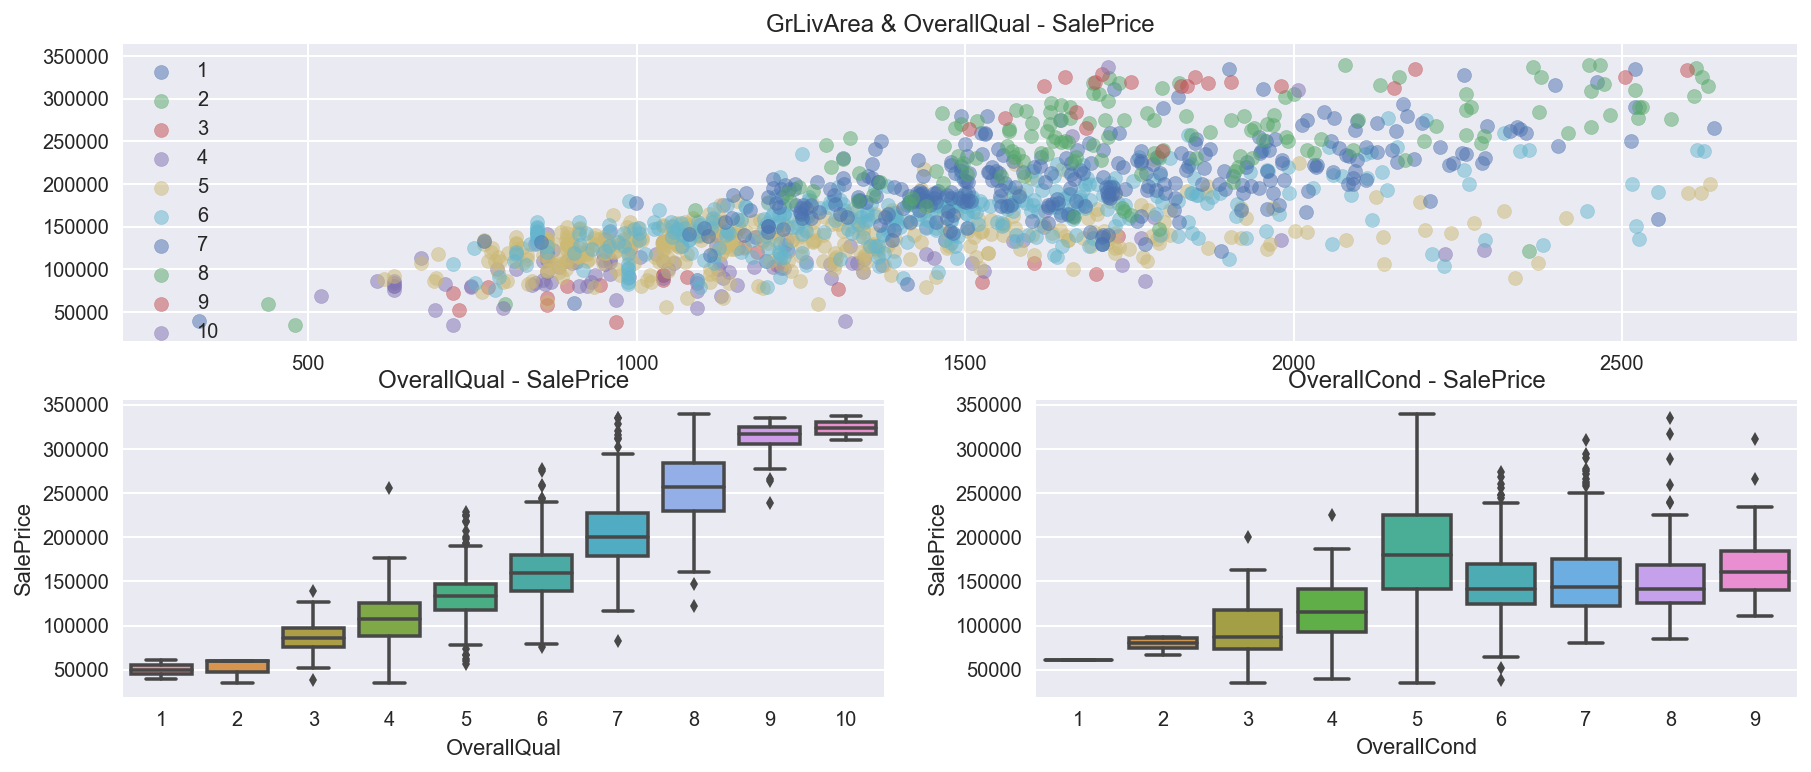

In [32]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
for qual in range(1,10+1):
    index = train.OverallQual == qual
    ax1.scatter(train.GrLivArea.loc[index], train.SalePrice.loc[index], data=train, label= qual, alpha =0.5)
ax1.legend(loc = 0)
ax1.set_title("GrLivArea & OverallQual - SalePrice")

ax2 = plt.subplot2grid((2,2), (1,0))
sns.boxplot(x = "OverallQual", y = "SalePrice", data=train, ax= ax2)
ax2.set_title('OverallQual - SalePrice')

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = "OverallCond", y = "SalePrice", data=train, ax= ax3)
ax3.set_title('OverallCond - SalePrice')

In [33]:
OverallQual_outlier = detect_outliers(train, "OverallQual")
OverallQual_outlier

[Int64Index([351, 499], dtype='int64')]

In [34]:
train=train.drop(train.index[OverallQual_outlier], axis=0).reset_index(drop=True)
train.shape

(1376, 81)

Find : 1. 품질과 집값은 선형관계를 발견할 수 있으나 overall condition과 집값은 관계가 없는것을 발견할 수 있었음

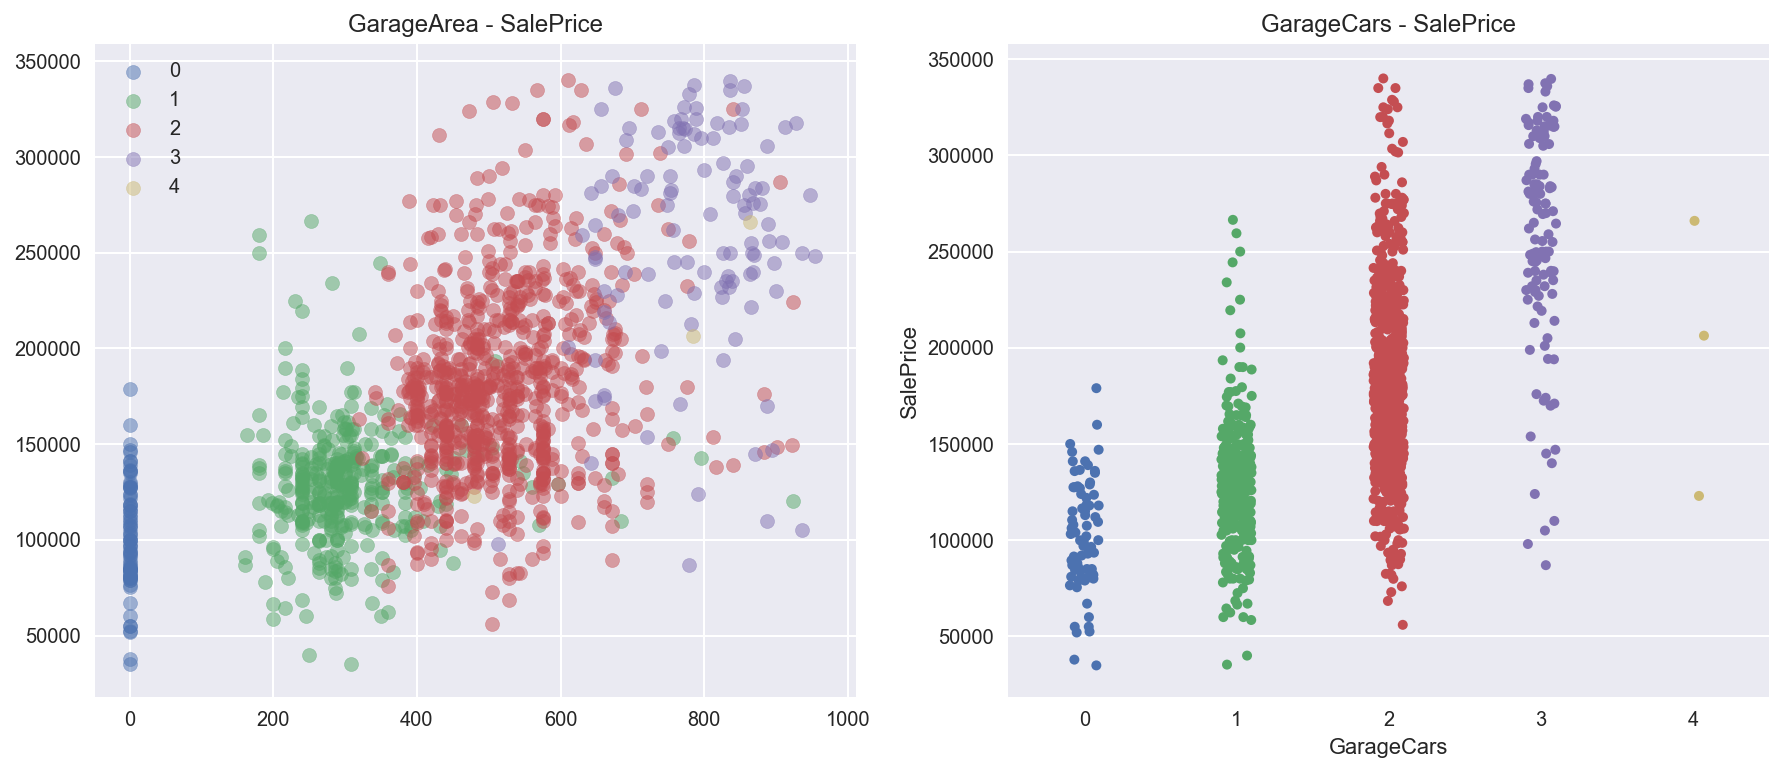

In [53]:
plt.figure(figsize=(15,6))

ax1 = plt.subplot(1,2,1)
for car in range(0,5):
    index = train.GarageCars == car
    ax1.scatter(x = train.GarageArea.loc[index], y = train.SalePrice.loc[index], data=train, label=car, alpha='0.5')

ax1.legend()
ax1.set_title('GarageArea - SalePrice')

ax2 = plt.subplot(1,2,2)
sns.stripplot(x = "GarageCars", y = "SalePrice", data=train,ax=ax2, jitter=True)
ax2.set_title('GarageCars - SalePrice')
ax2.legend()

plt.show()

In [51]:
GarageCars_outlier = detect_outliers(train, "GarageArea")
GarageCars_outlier

[Int64Index([257, 300, 545, 995, 1021, 1112, 1118, 1271, 1334], dtype='int64')]

In [52]:
train=train.drop(train.index[GarageCars_outlier], axis=0).reset_index(drop=True)
train.shape

(1367, 81)

### Neighborhood

In [113]:
Neighbor = train.pivot_table(index="Neighborhood",values="SalePrice", aggfunc='mean').sort_values(by = ["SalePrice"], ascending = False)
Neighbor = Neighbor.reset_index()
Neighbor

Neighborhood      SalePrice
0       NoRidge  280177.230769
1       NridgHt  260541.489796
2       StoneBr  239312.500000
3        Timber  230554.636364
4       Veenker  224150.000000
5       Somerst  219762.814815
6       ClearCr  213012.296296
7       Crawfor  197750.234043
8       CollgCr  195175.851351
9       Blmngtn  194870.882353
10      Gilbert  190487.256410
11       NWAmes  184476.159420
12      SawyerW  182206.877193
13      Mitchel  156025.750000
14        NAmes  143862.411765
15      NPkVill  142694.444444
16        SWISU  137729.739130
17      Blueste  137500.000000
18       Sawyer  136793.135135
19      Edwards  128002.268041
20      BrkSide  126334.649123
21      OldTown  120536.321101
22       BrDale  104493.750000
23       IDOTRR  100655.000000
24      MeadowV   98576.470588

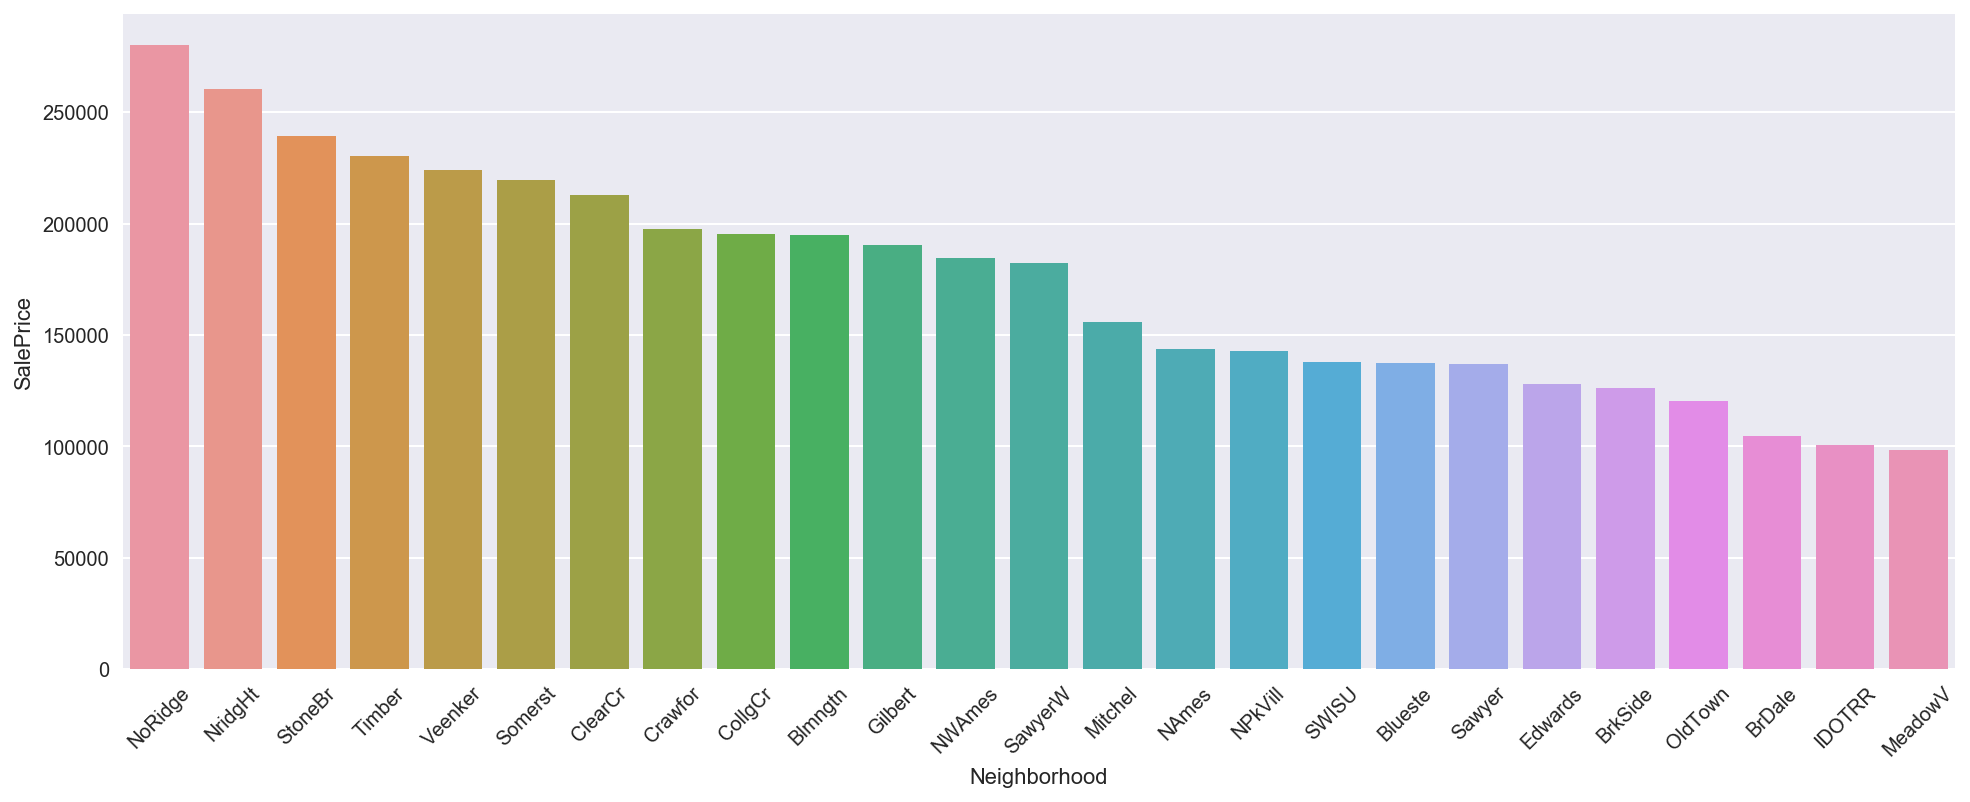

In [128]:
g = sns.factorplot(x = "Neighborhood", y="SalePrice", data=Neighbor, size =8, kind="bar")
g.set_xticklabels(rotation=45)
g.fig.set_size_inches(15,5)
plt.show()

In [129]:
def Gp_Neighborhood(saleprice):
    if saleprice > 250000:
        return "first_group"
    elif saleprice > 200000:
        return "second_group"
    elif saleprice > 150000:
        return "third_group"
    else: 
        return "fourth_group"

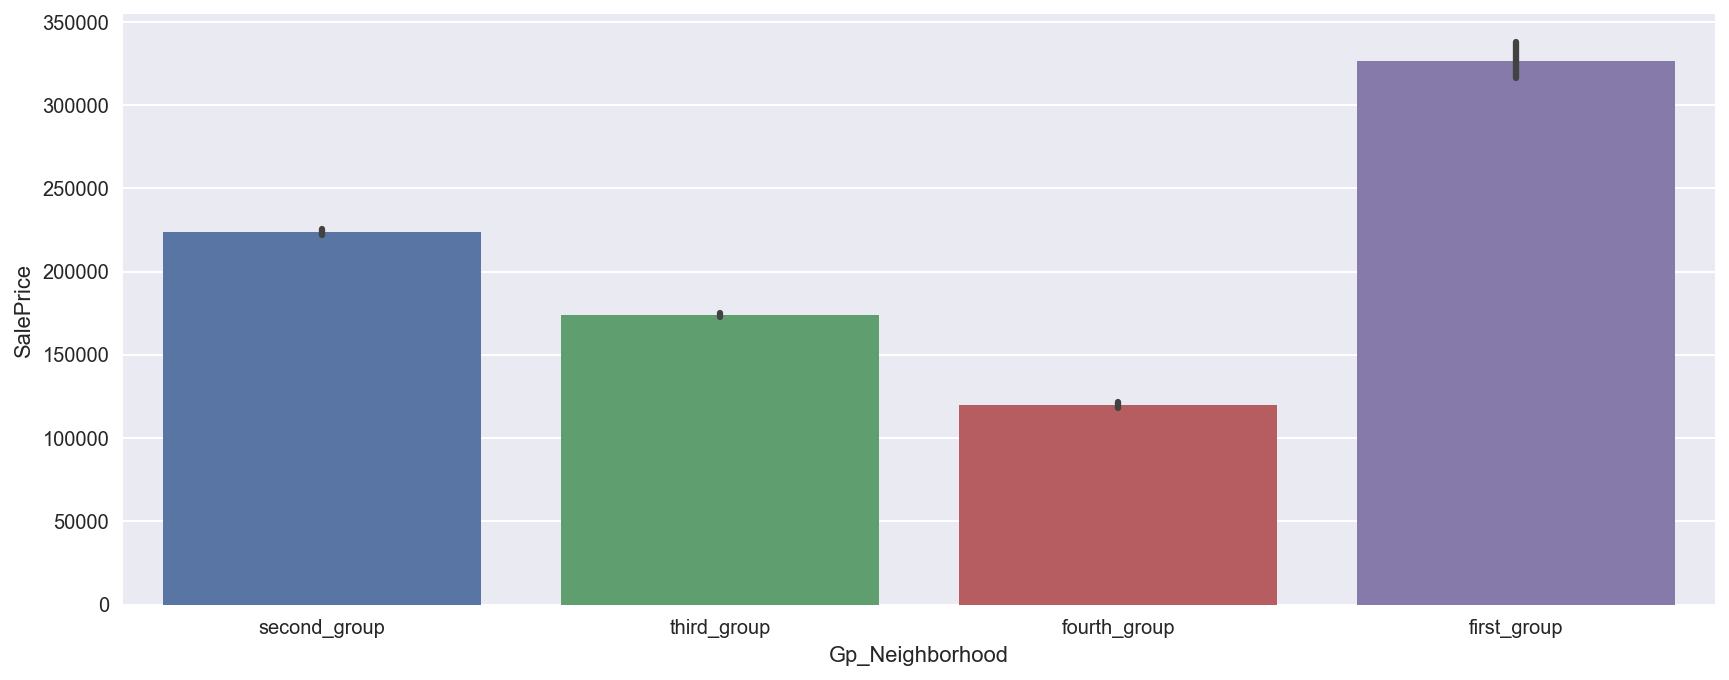

In [26]:
df_train["Gp_Neighborhood"] = train["SalePrice"].apply(Gp_Neighborhood)
g = sns.factorplot(x="Gp_Neighborhood", y="SalePrice", data=train, kind="bar")
g.fig.set_size_inches(15,5)
plt.show()

### Year

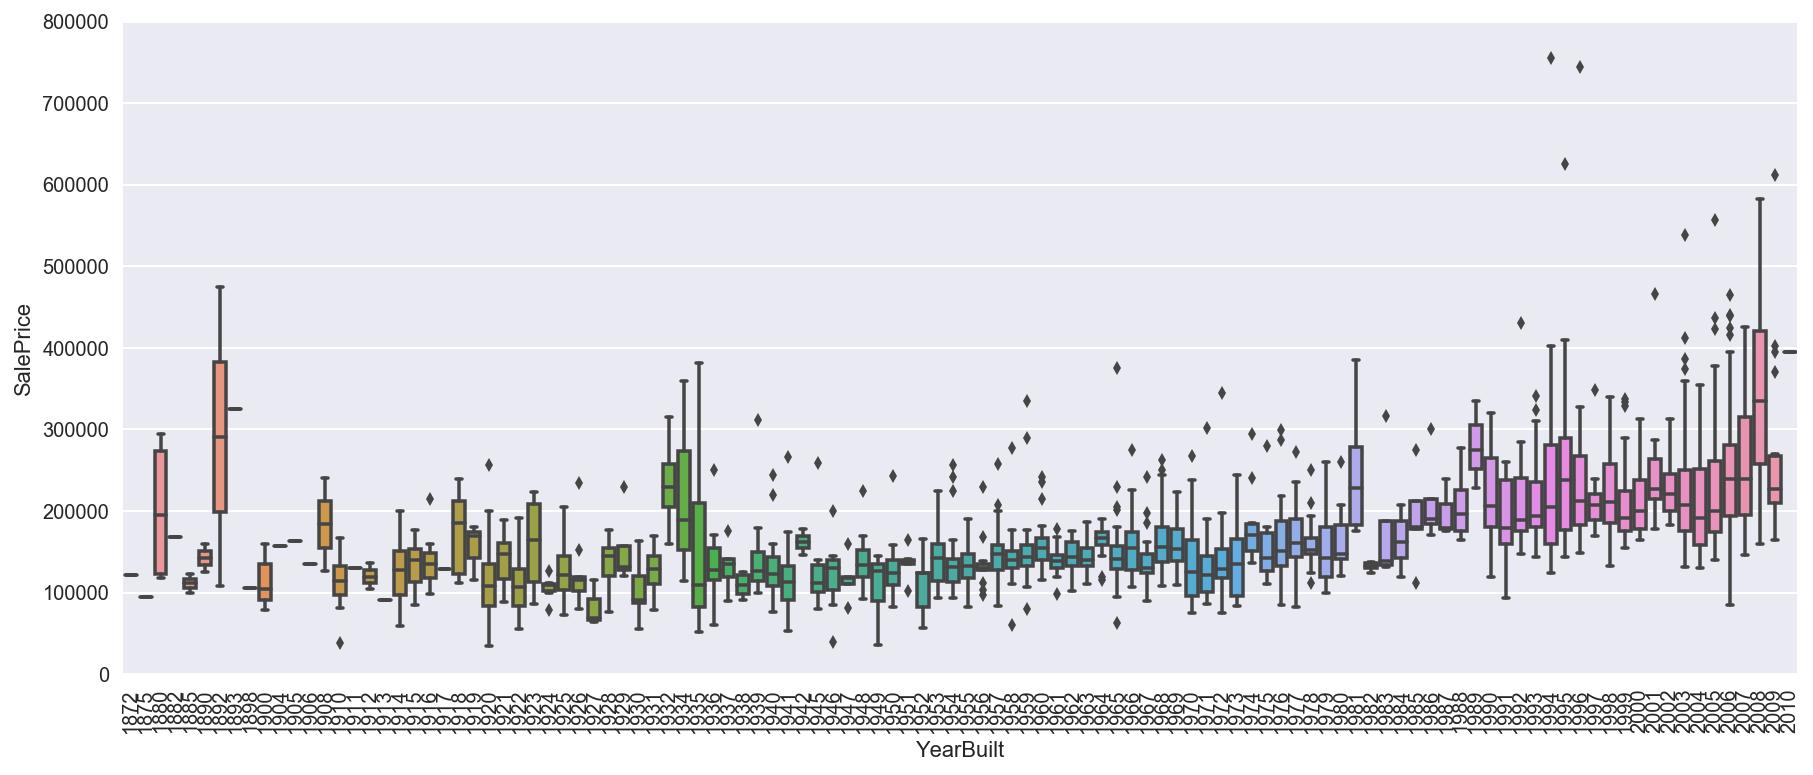

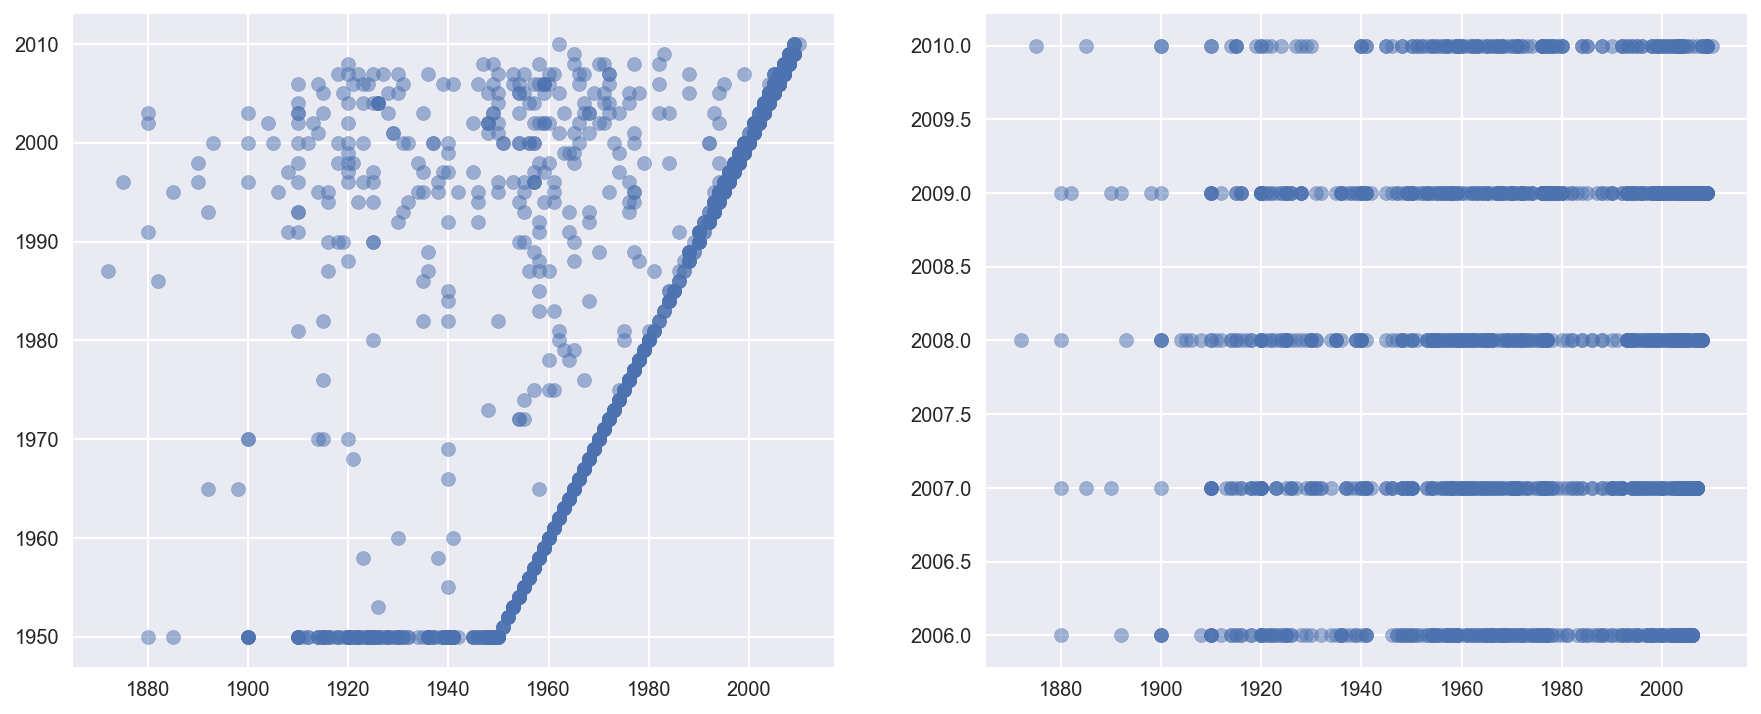

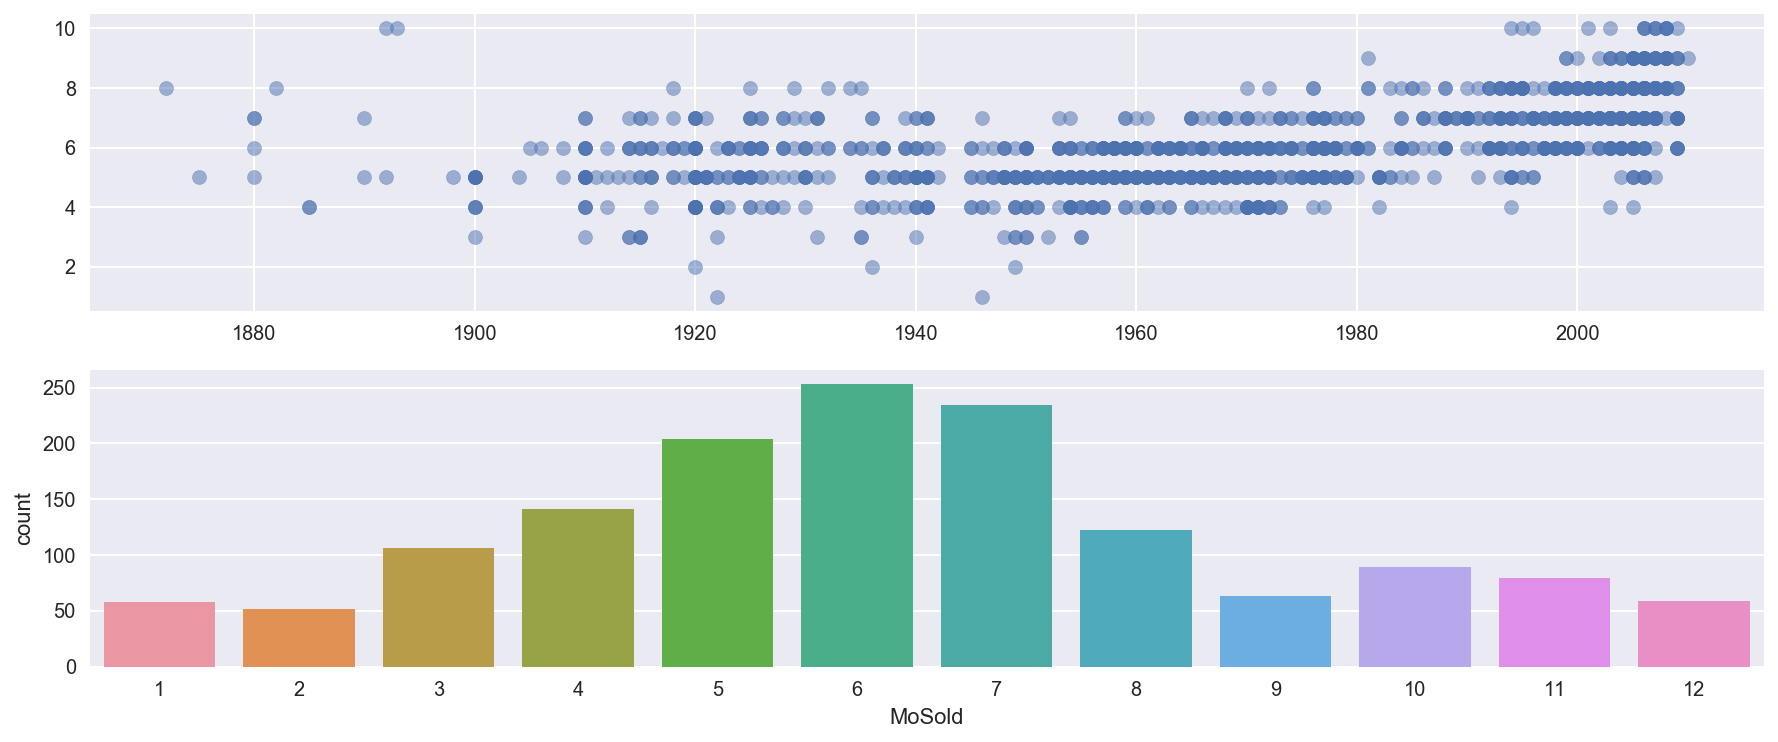

In [27]:
plt.figure(figsize=(15,6))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,6))
ax2 = plt.subplot(1,2,1)
ax2.scatter(x = train['YearBuilt'], y = train['YearRemodAdd'], alpha = 0.5)
ax3 = plt.subplot(1,2,2)
ax3.scatter(x = train['YearBuilt'], y = train['YrSold'], alpha = 0.5)
plt.show()

plt.figure(figsize=(15,6))
ax4 = plt.subplot2grid((2,2), (0,0), colspan = 2)
ax4.scatter(x = train['YearBuilt'], y = train['OverallQual'], alpha = 0.5)
ax5 = plt.subplot2grid((2,2), (1,0), colspan = 2)
sns.countplot(x = "MoSold", data=train, ax = ax5)
plt.show()

Find

1.

### Fireplace

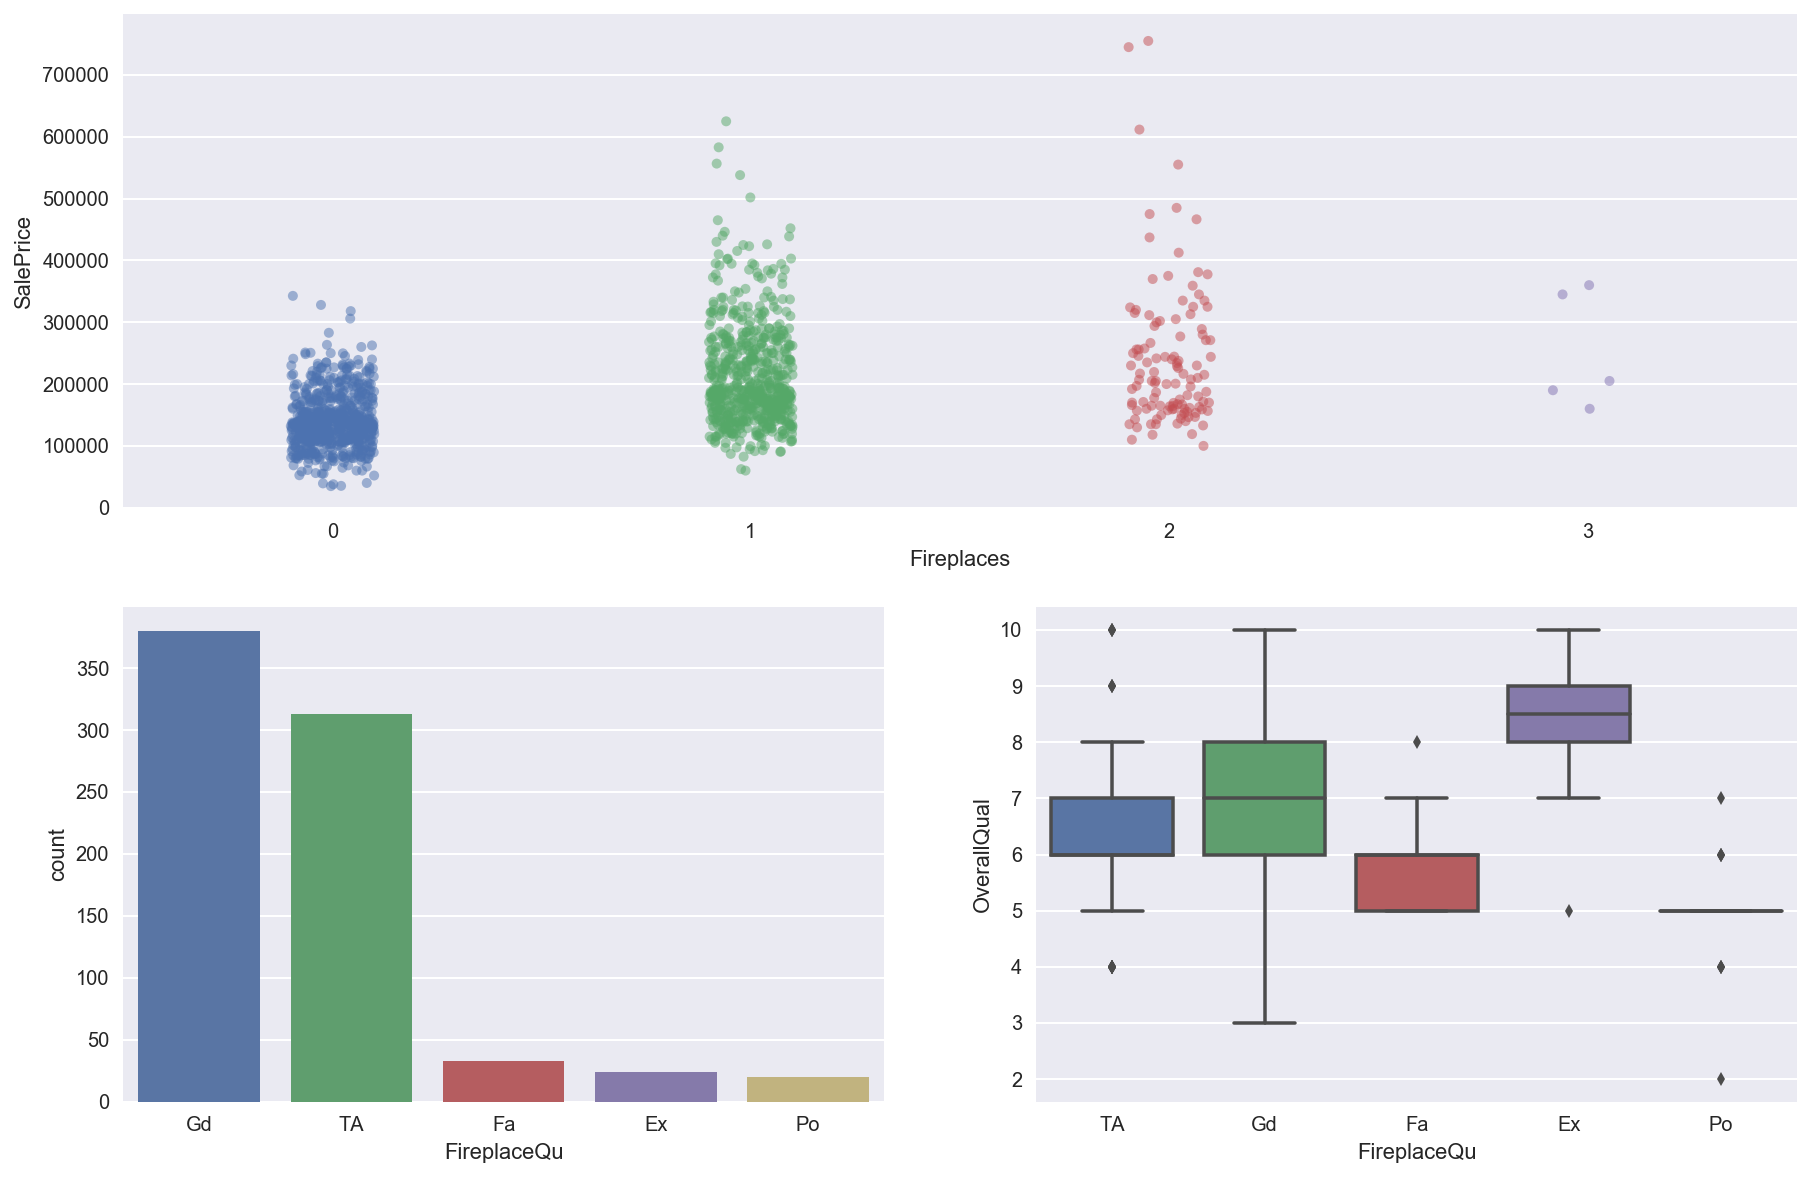

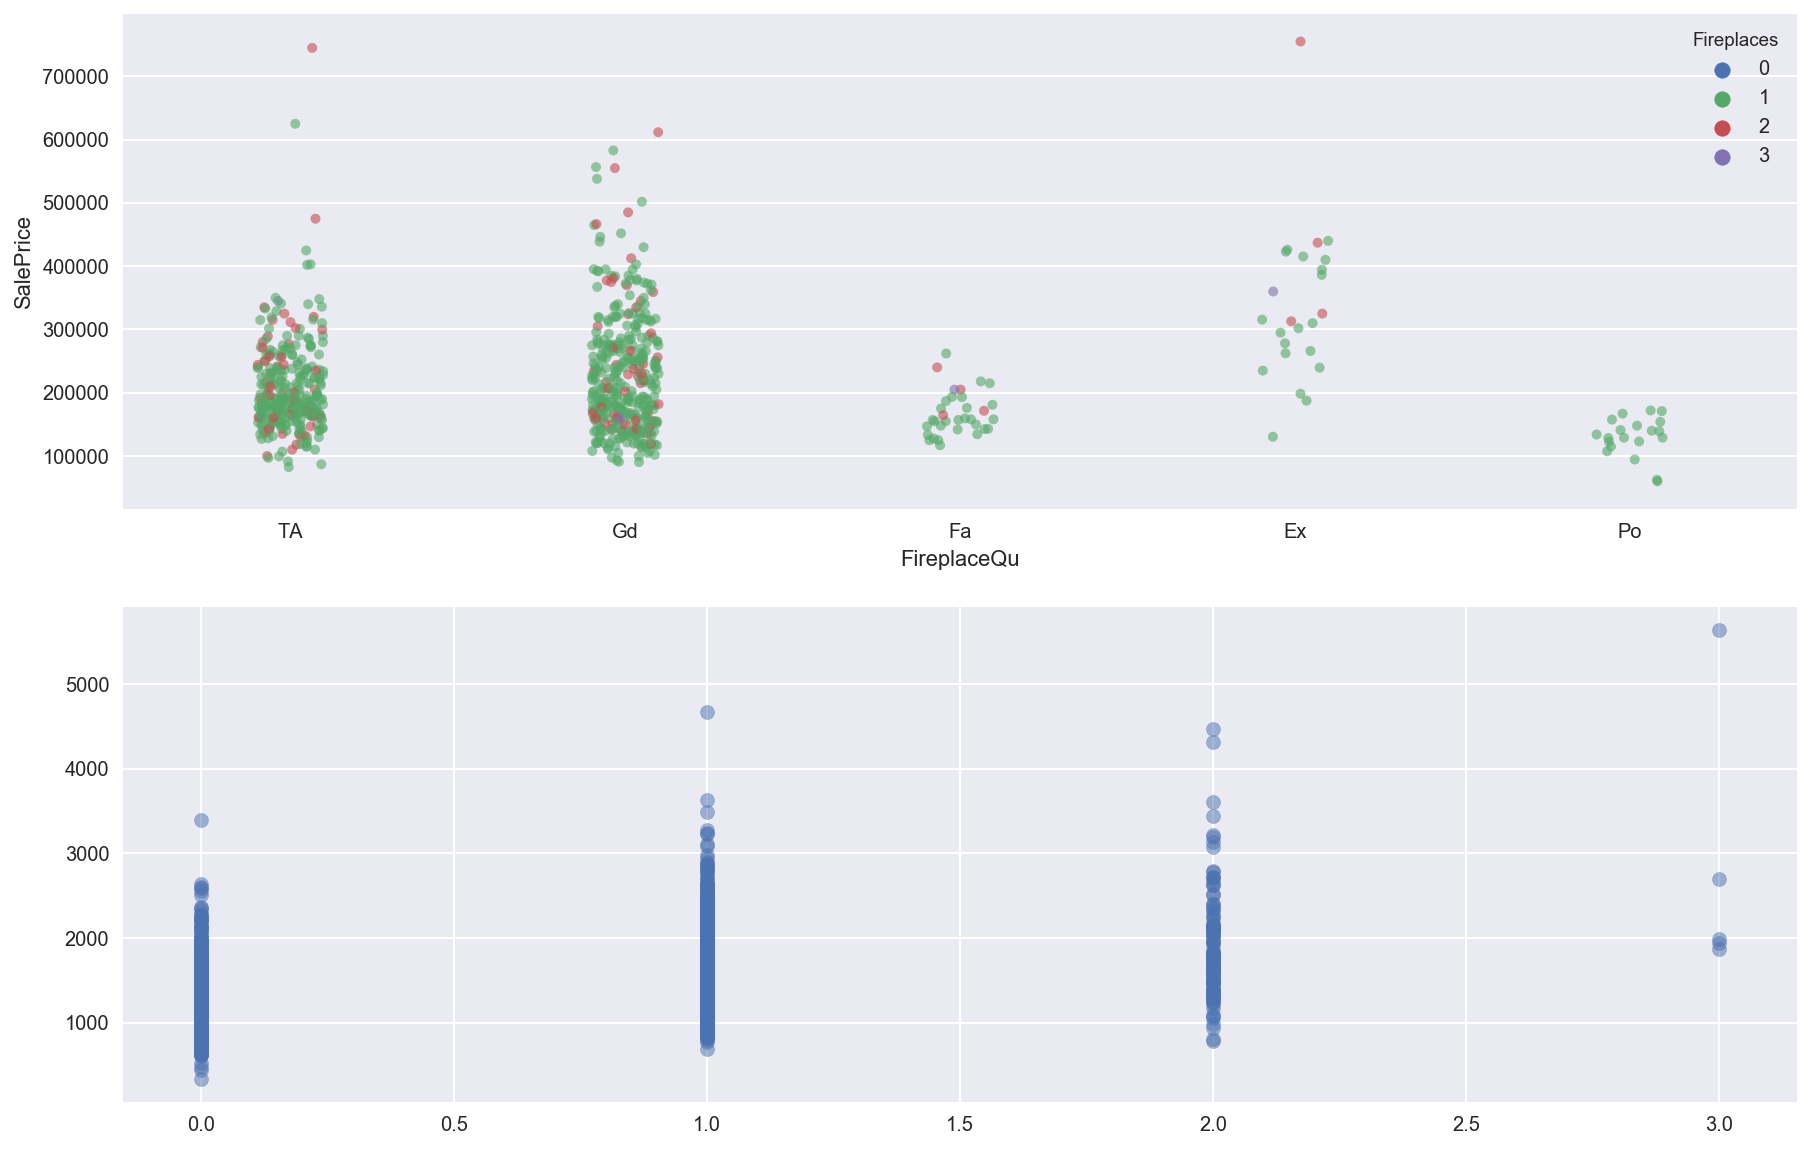

In [28]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,2), (0,0), colspan = 2)
sns.stripplot(x = train['Fireplaces'], y = train['SalePrice'], alpha = 0.5, jitter = True, ax=ax1)

ax2 = plt.subplot2grid((2,2), (1,0))
sns.countplot(x = "FireplaceQu", data=train, ax = ax2, order = train["FireplaceQu"].value_counts().index)

ax3 = plt.subplot2grid((2,2), (1,1))
sns.boxplot(x = 'FireplaceQu', y = 'OverallQual', data = train, ax=ax3)
plt.show()

plt.figure(figsize=(15,10))
ax4 = plt.subplot(2,1,1)
sns.stripplot(x='FireplaceQu', y='SalePrice', hue='Fireplaces', data=train, jitter=True, alpha=0.6, ax=ax4)

ax5 = plt.subplot(2,1,2)
ax5.scatter(x = train['Fireplaces'], y = train['GrLivArea'], alpha = 0.5)
plt.show()


Find

1.

### BsmtBath

BsmtFullBath : 지하실 가득한 욕실  
BsmtHalfBath : 지하 욕실 반 화장실

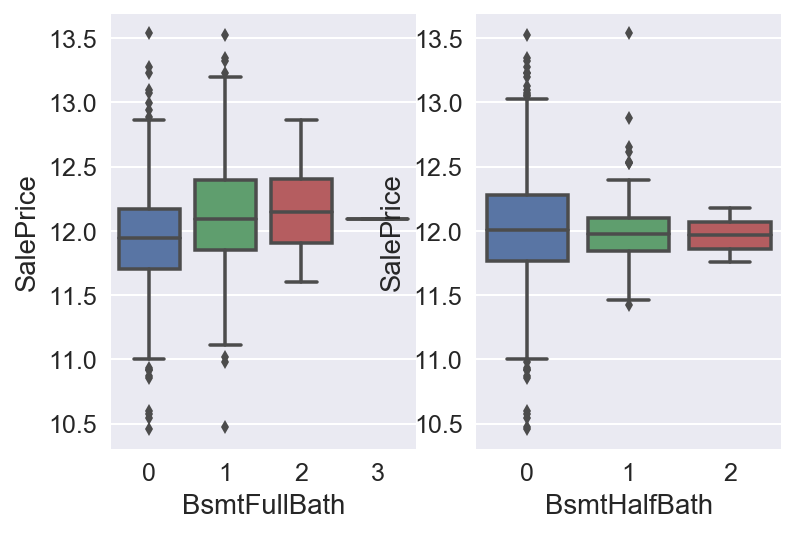

In [40]:
plt.subplot(121)
sns.boxplot(x = "BsmtFullBath", y = "SalePrice", data=train)

plt.subplot(122)
sns.boxplot(x = "BsmtHalfBath", y = "SalePrice", data=train)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 0.        ,  0.        ,  0.        , ...,  1.09861229,
          1.09861229,  1.38629436])),
 (0.28313199432700603, 0.29139453483588318, 0.80798593619069892))

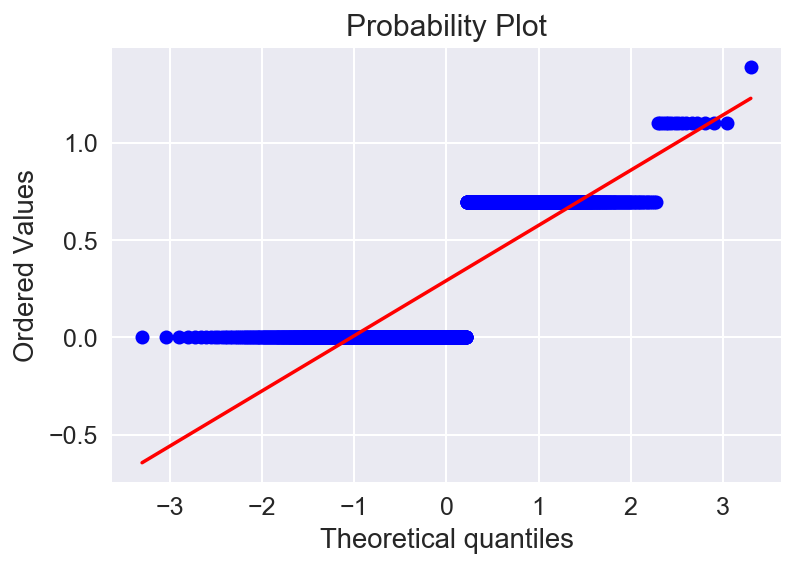

In [41]:
test = np.log1p(train.BsmtFullBath)
stats.probplot(test, plot=plt)
# stats.probplot(train["BsmtFullBath"], plot=plt)
# stats.probplot(train["BsmtHalfBath"], plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]), array([0, 0, 0, ..., 2, 2, 3])),
 (0.42173550803653326, 0.42534246575342471, 0.81139099723004959))

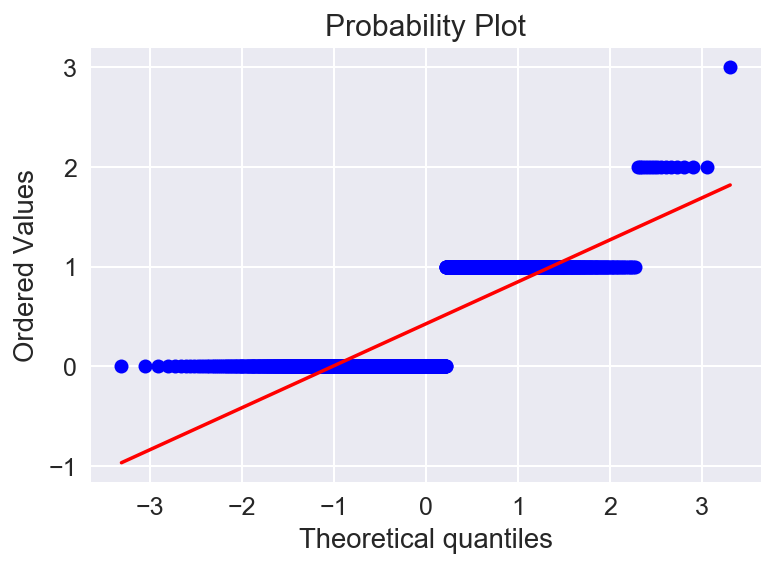

In [42]:
stats.probplot(train["BsmtFullBath"], plot=plt)

Full Bath의 경우에는 영향이 있으나 HalfBath의 경우에는 영향이 미미한것으로 확인할 수 있음

### TotRm and Bedroom

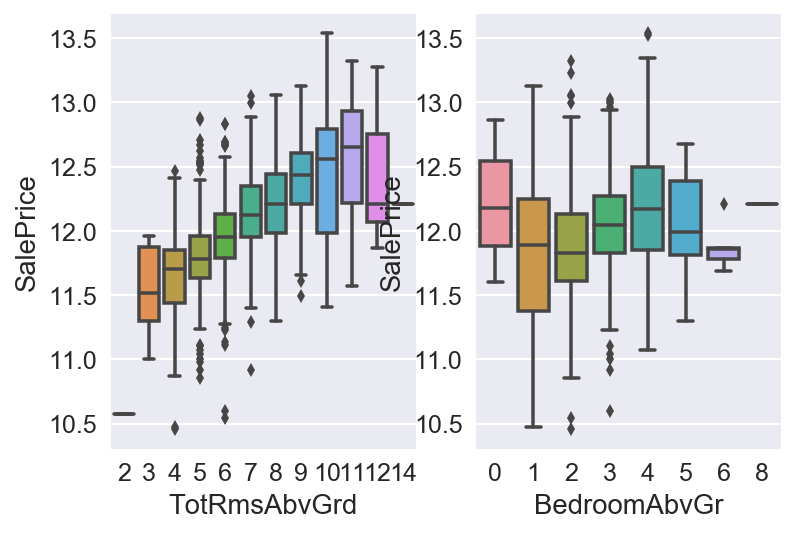

In [43]:
plt.subplot(121)
sns.boxplot(x = "TotRmsAbvGrd", y = "SalePrice", data=train)

plt.subplot(122)
sns.boxplot(x = "BedroomAbvGr", y = "SalePrice", data=train)

확실히 TotRmsAbvGrd 는 연관관계가 있는것으로 보임

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]), array([0, 0, 0, ..., 6, 6, 8])),
 (0.75270295271376852, 2.8664383561643834, 0.9211580913546914))

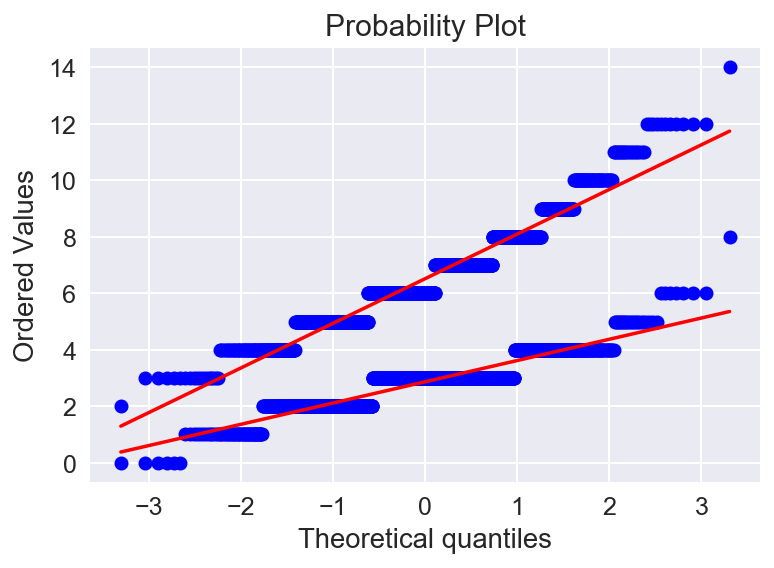

In [44]:
stats.probplot(train["TotRmsAbvGrd"], plot=plt)
stats.probplot(train["BedroomAbvGr"], plot=plt)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28206f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2825cb70>]], dtype=object)

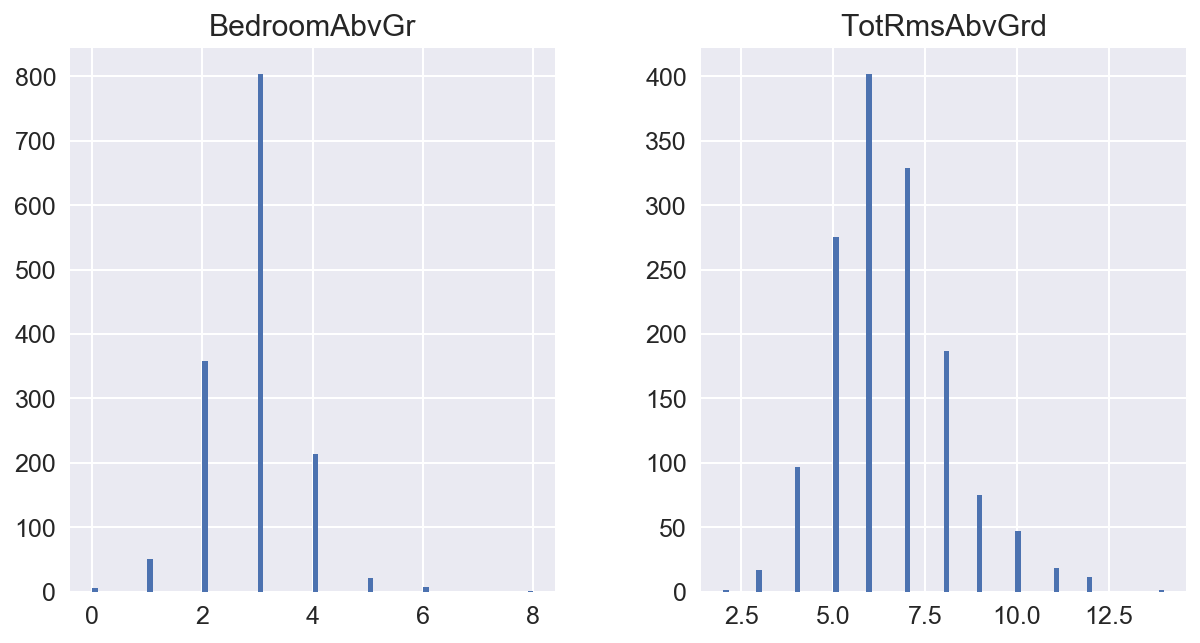

In [45]:
train[['TotRmsAbvGrd', 'BedroomAbvGr']].hist(bins=80, figsize=(10,5))

Tot : 길게 하나 하고, 어떤 방이 여기에 포함되어있는지 확인필요

이런 데이터의 경우에는 확실히 한단계 데이터 조치가 필요할것으로 보임
이런 경우는 어떻게 해야하지?

Full Bath의 경우에는 영향이 있으나 HalfBath의 경우에는 영향이 미미한것으로 확인할 수 있음

### 아웃라이어제거

In [29]:
# Saleprice_outlier

# GrLivArea_outlier,

# GarageCars_outlier,

# OverallQual_outlier

### Encoding

In [30]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
categoric_encoded = []
for q in categoric_features:  
    encode(train, q)
    categoric_encoded.append(q+'_E')
print(categoric_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [31]:
corrmat = train.corr()
corrmat

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id               1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass       0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage     -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea         -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual     -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond      0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt       -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd    -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea      -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1      -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2      -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF       -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF     -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF         0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF         0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF    -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea        0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath     0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath    -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath         0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath         0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr     0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr     0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd     0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces      -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt      0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars       0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea       0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF      -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF     -0.000477   -0.006100     0.151972  0.084774     0.308819   
...                   ...         ...          ...       ...          ...   
RoofStyle_E      0.043882   -0.137128     0.199282  0.109262     0.177279   
RoofMatl_E      -0.041767   -0.038201     0.060538  0.160014     0.094504   
Exterior1st_E   -0.008711   -0.009410     0.082645  0.021076     0.382595   
Exterior2nd_E   -0.009013   -0.022945     0.097218  0.032612     0.375812   
MasVnrType_E     0.003107    0.027842     0.129429  0.004362     0.451152   
ExterQual_E      0.005039    0.016178     0.178993  0.055570     0.726278   
ExterCond_E      0.041433   -0.013197     0.049837  0.021107     0.172852   
Foundation_E    -0.006660    0.060091     0.088604 -0.019335     0.568969   
BsmtQual_E      -0.041261    0.080763     0.172627  0.077951     0.664650   
BsmtCond_E       0.012356   -0.005129     0.049283  0.028082     0.177320   
BsmtExposure_E   0.017536    0.057653     0.179718  0.232055     0.261213   
BsmtFinType1_E  -0.009797    0.141157     0.029424 -0.031010     0.434480   
BsmtFinType2_E  -0.003991    0.054854    -0.027840 -0.082254     0.131095   
Heating_E       -0.051299   -0.025773     0.010779 -0.015138     0.138830   
HeatingQC_E     -0.015001   -0.019458     0.098509  0.003581     0.457083   
CentralAir_E     0.009821   -0.101774     0.071659  0.049755     0.272038   
Electrical_E     0.056480    0.027220     0.067738  0.047446     0.242558   
KitchenQual_E    0.014973   -0.012383     0.181839  0.067864     0.673331   
Functional_E    -0.008264    0.030163     0.017524 -0.024443     0.172150   
FireplaceQu_E    0.027052   -0.035341     0.082773  0.038174     0.355867   
GarageType_E    -0.

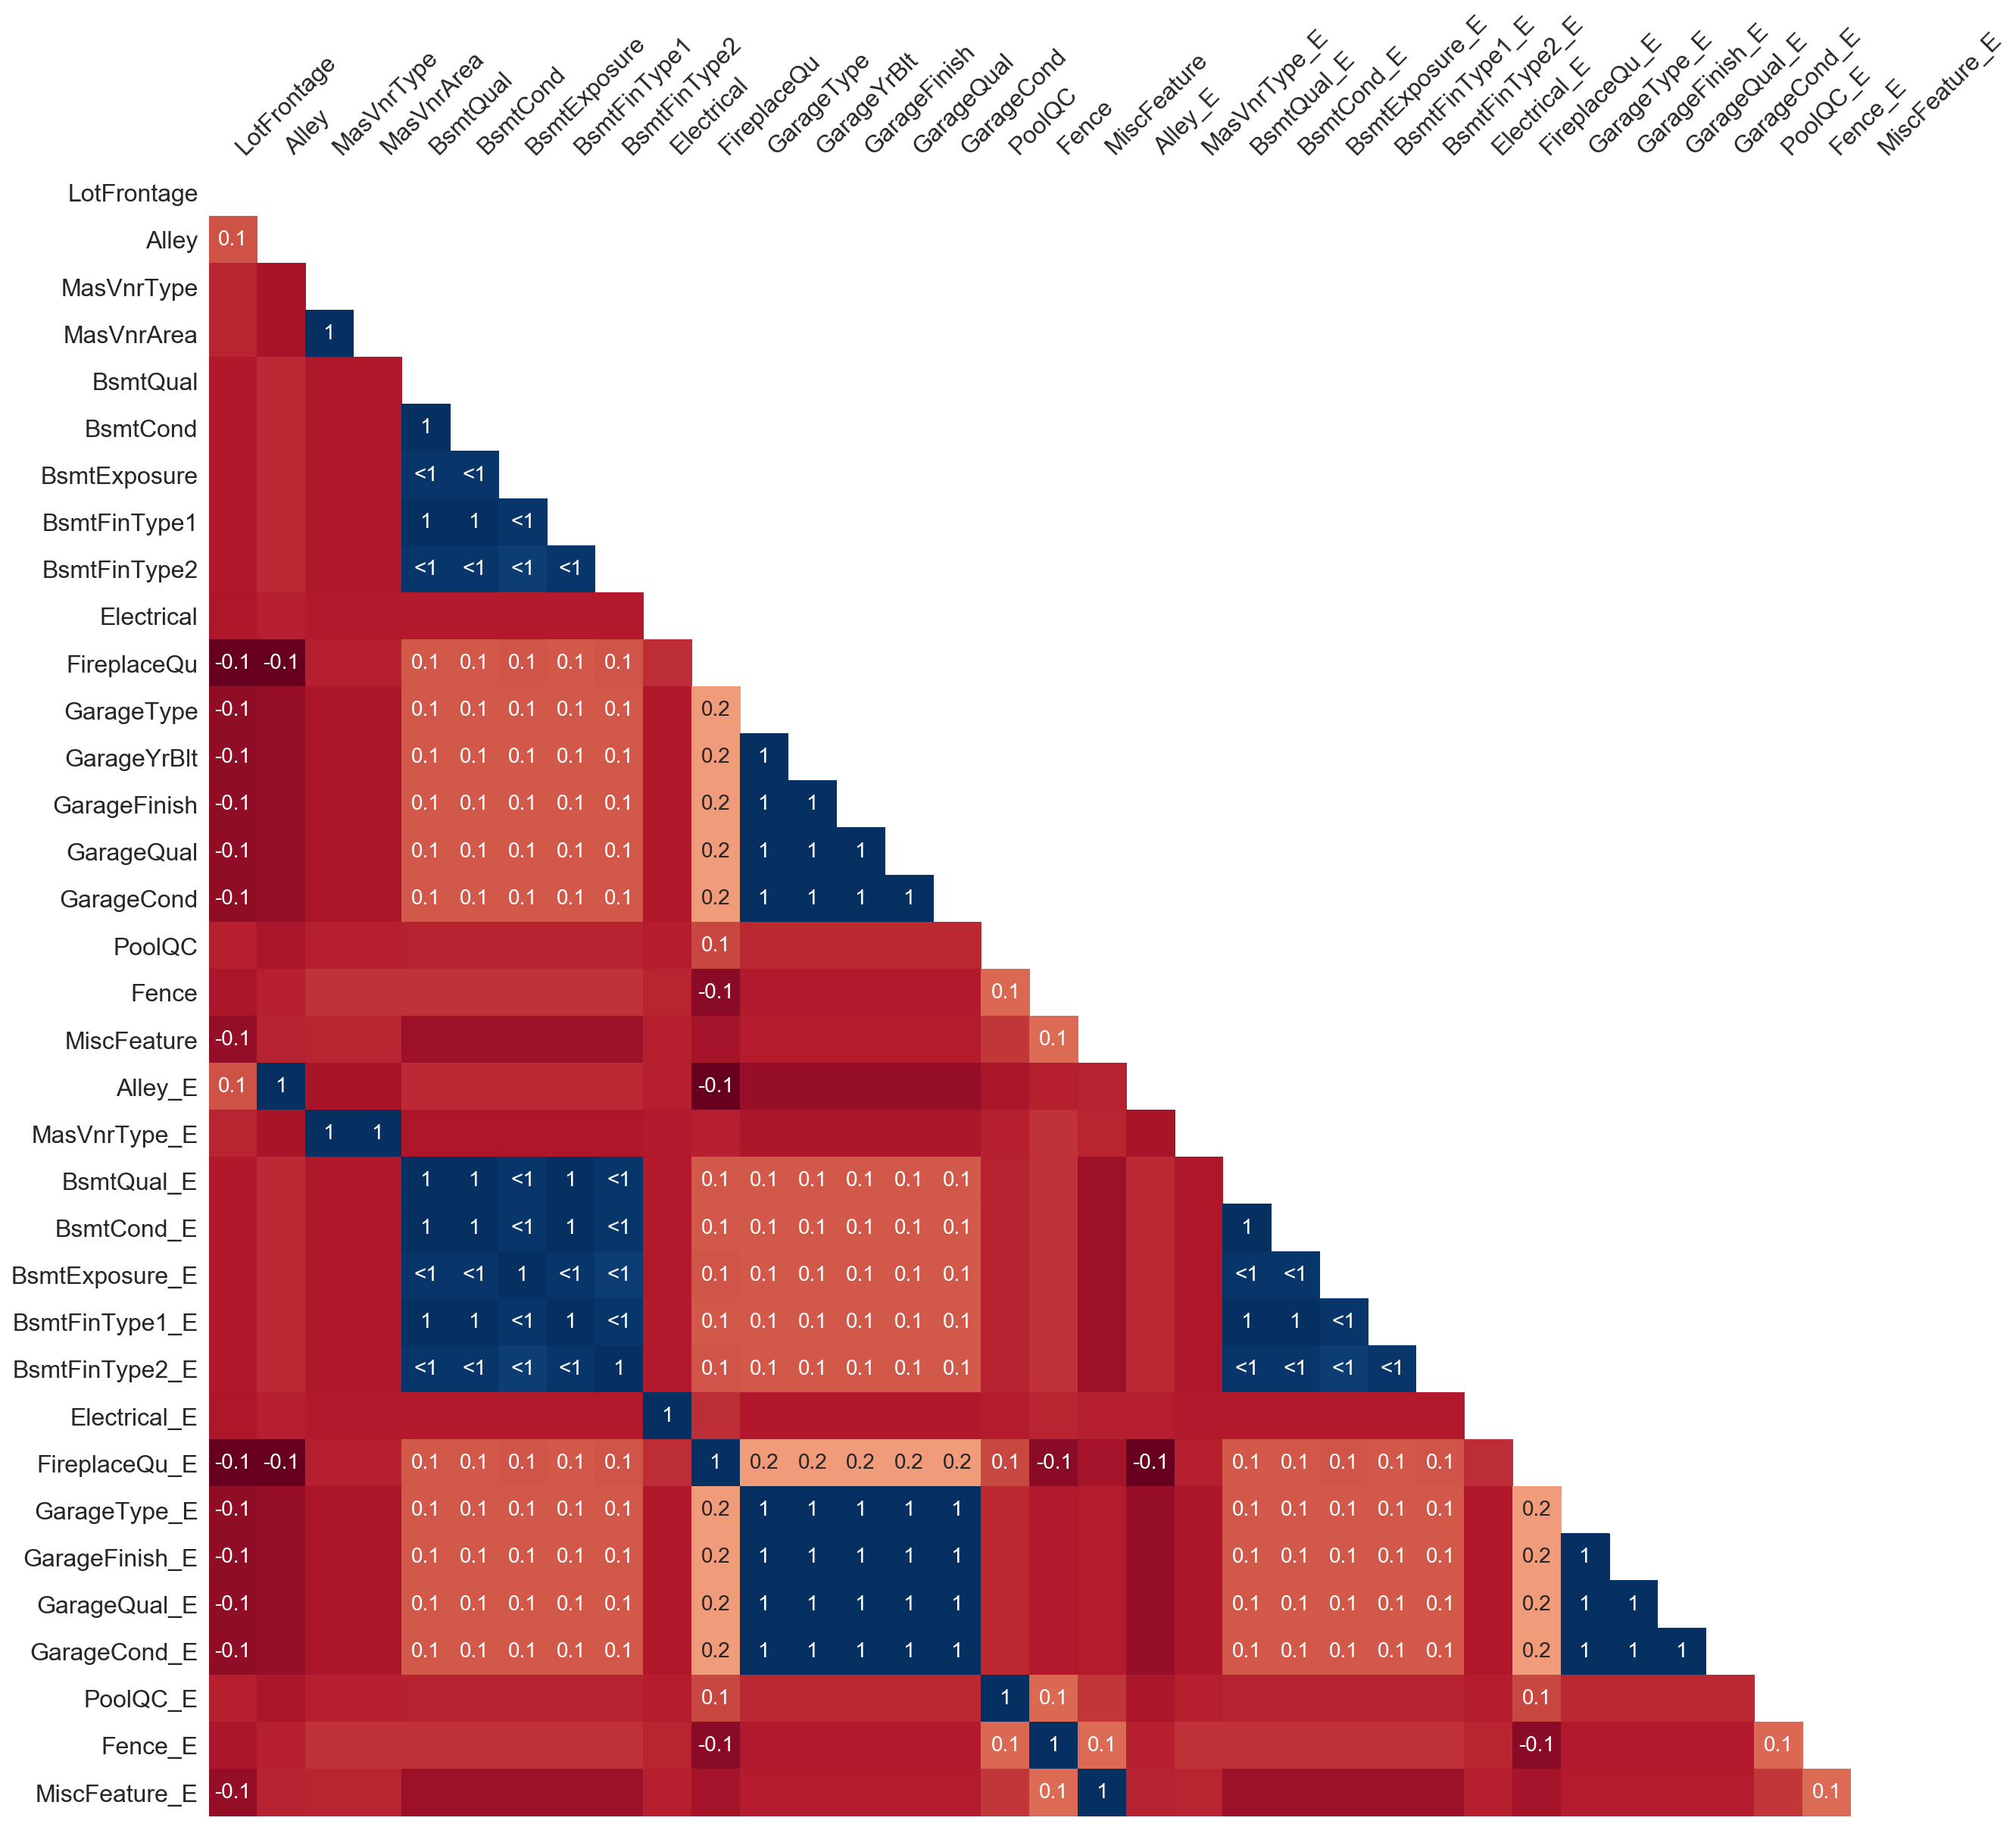

In [38]:
import missingno as msno

missingValueColumns = train.columns[train.isnull().any()].tolist()
msno.heatmap(train[missingValueColumns],figsize=(20,20))

In [ ]:
cols = corrmat.nlargest(30, 'SalePrice')['SalePrice'].index
cols

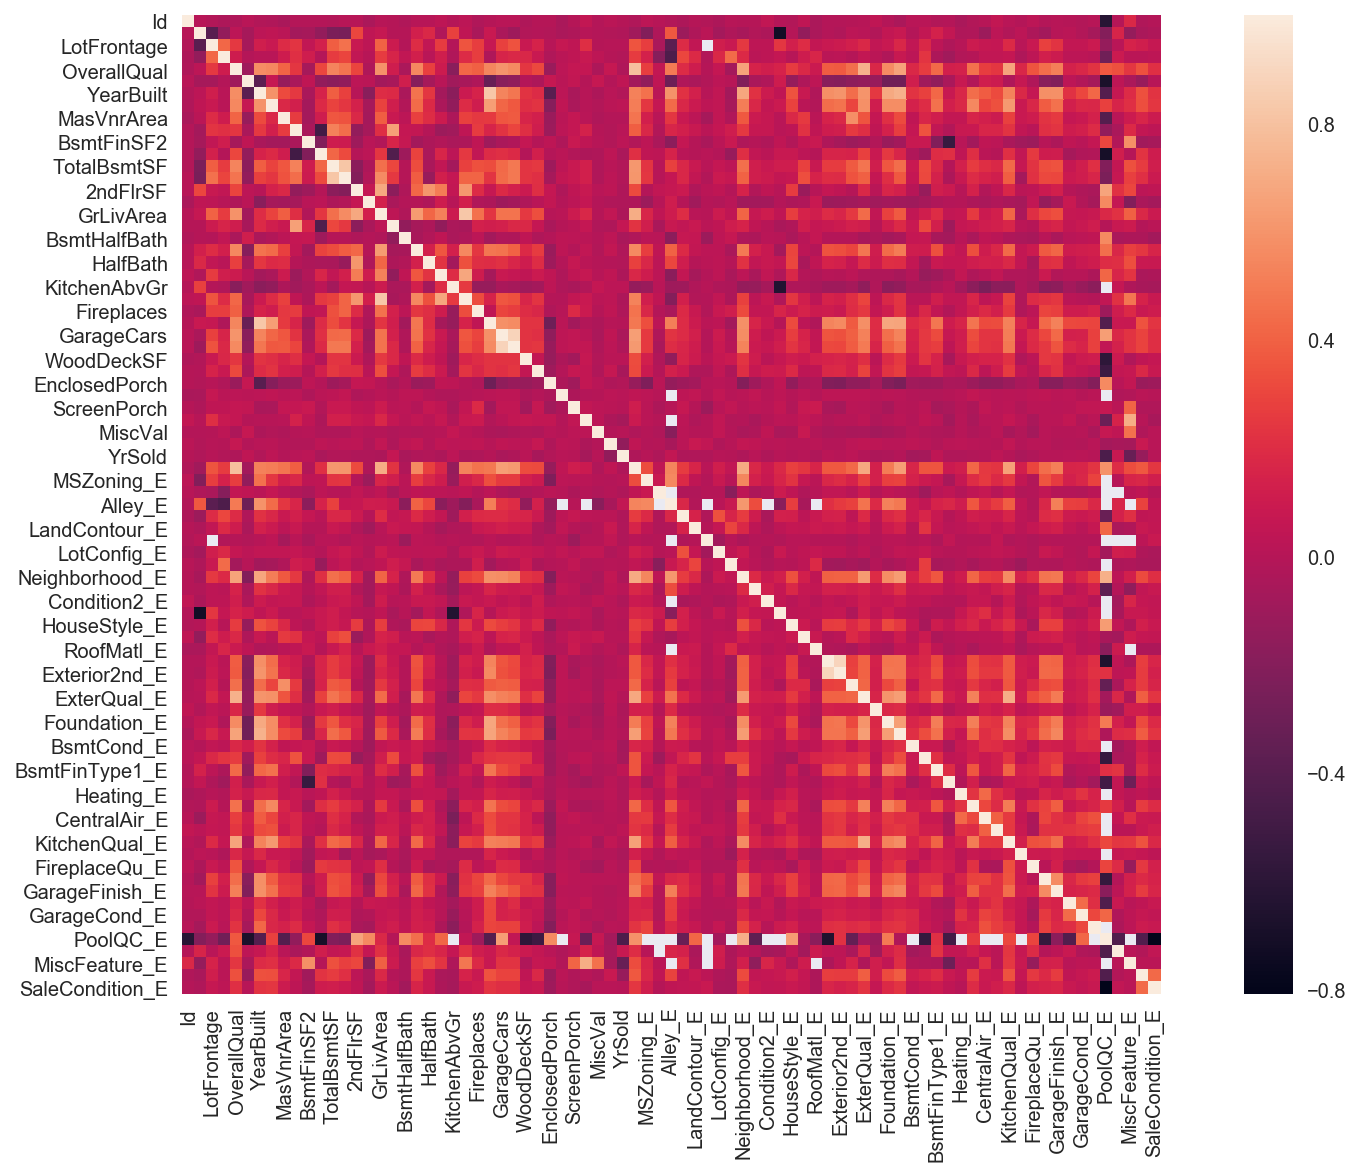

In [32]:
f, ax = plt.subplots(figsize = (15,9))
sns.heatmap(corrmat, vmax = 1, square=True)

In [33]:
cols = corrmat.nlargest(20, 'SalePrice')['SalePrice'].index 
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'Neighborhood_E',
       'ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'GarageCars',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'PoolQC_E', 'FullBath',
       'Alley_E', 'TotRmsAbvGrd', 'YearBuilt', 'GarageFinish_E',
       'YearRemodAdd', 'Foundation_E', 'GarageYrBlt'],
      dtype='object')

[]

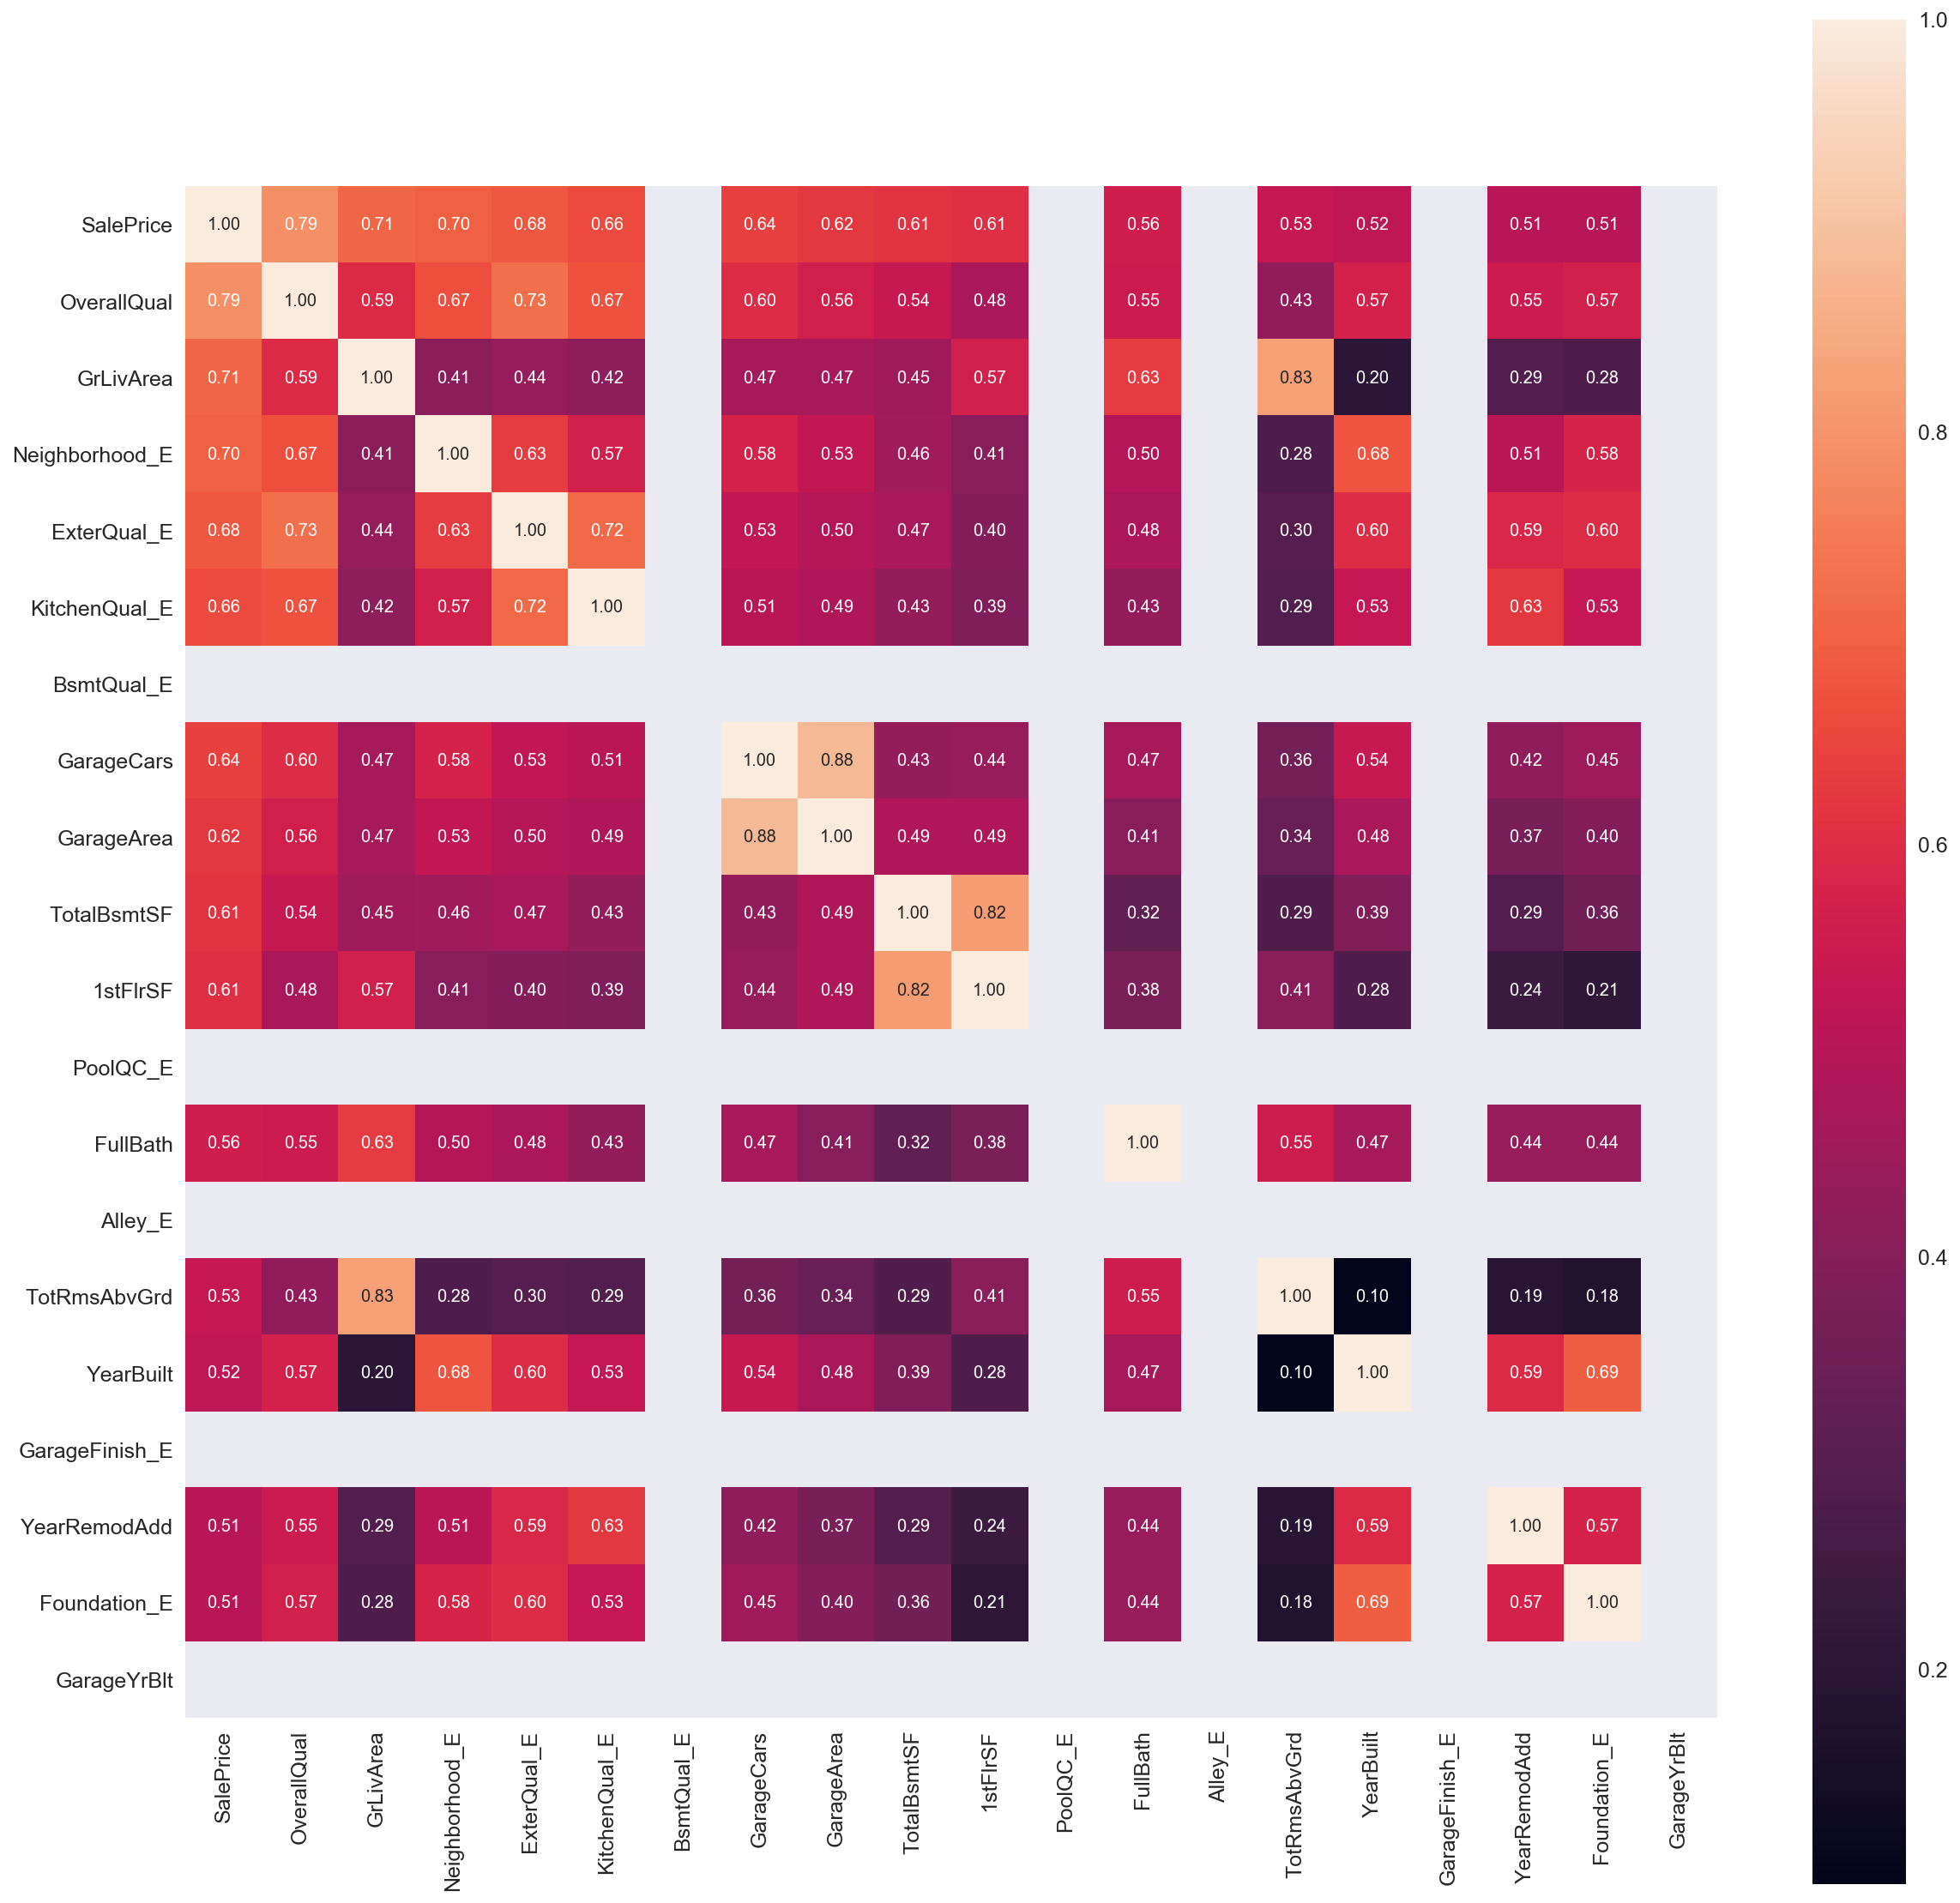

In [34]:
cm = np.corrcoef(train[cols].values.T)

plt.figure(figsize=(20,20))
sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',\
              annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.plot()

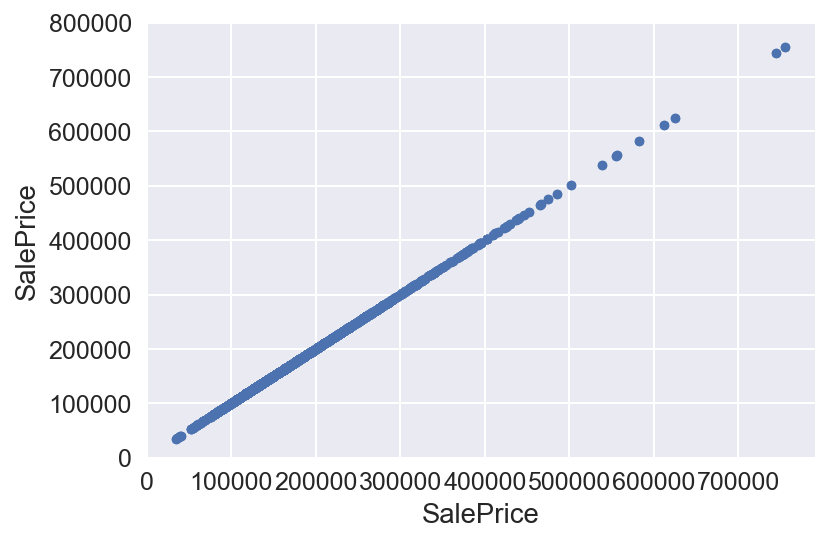

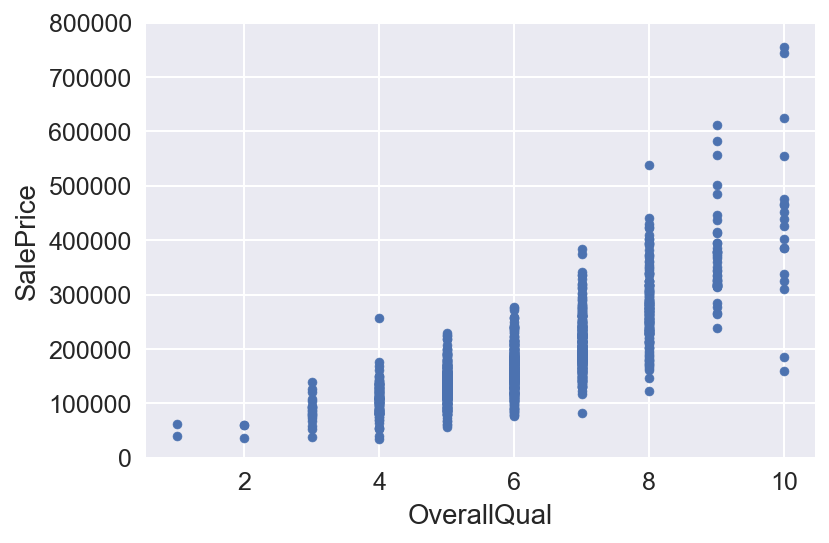

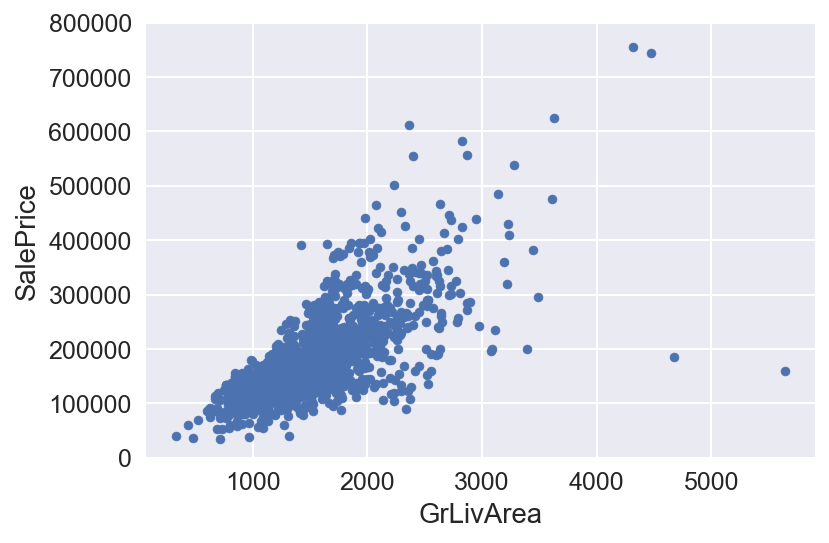

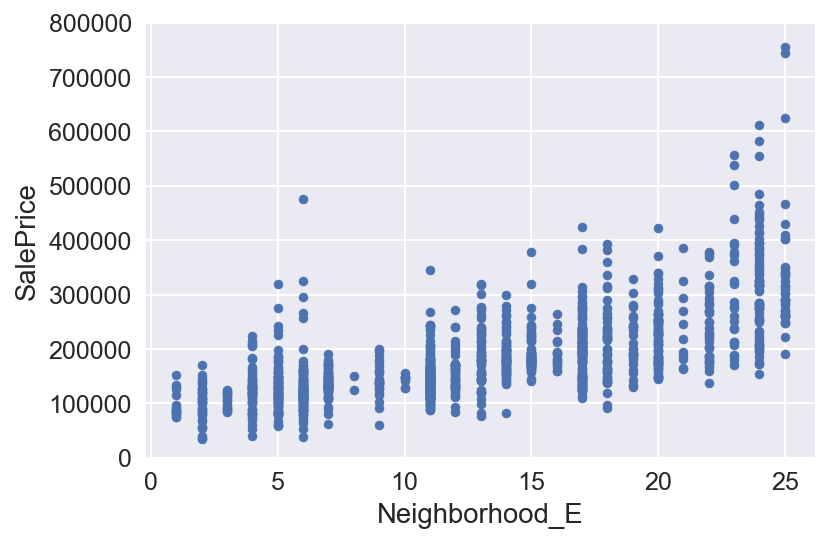

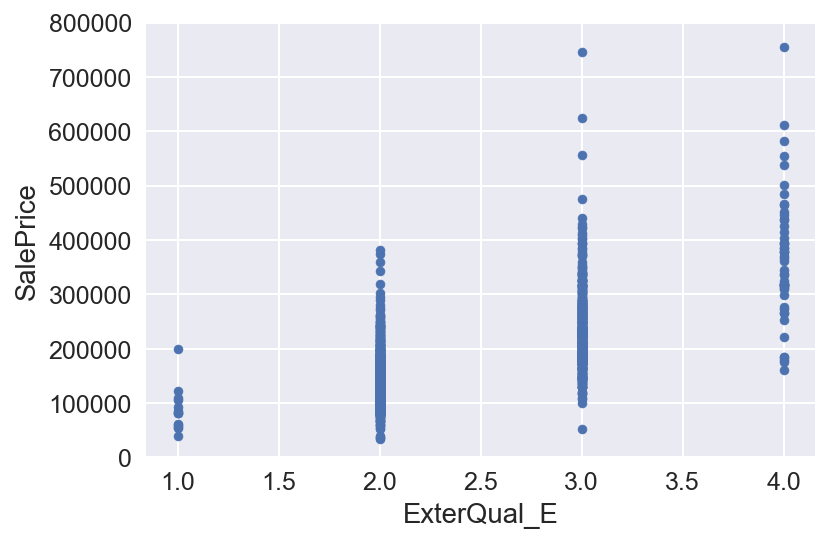

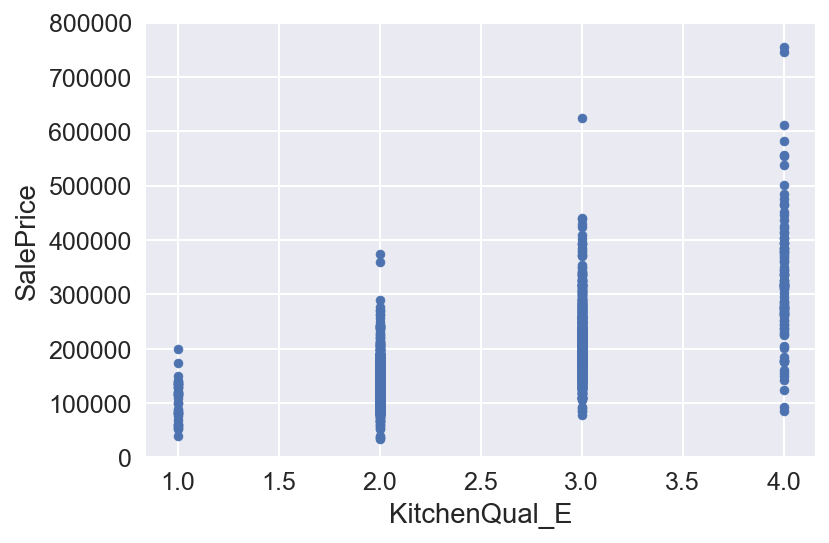

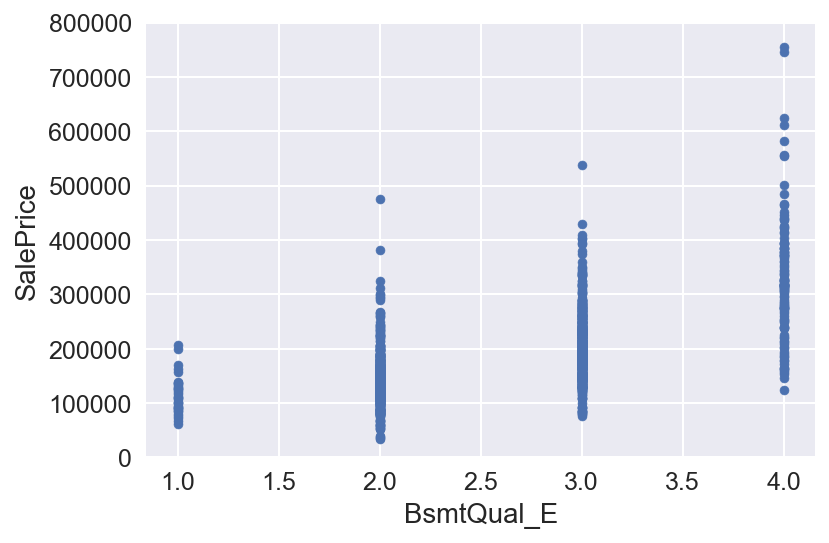

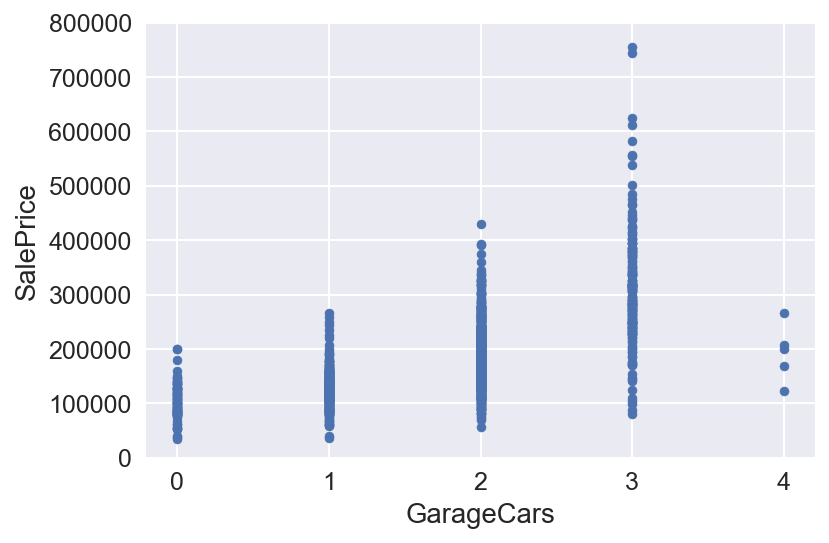

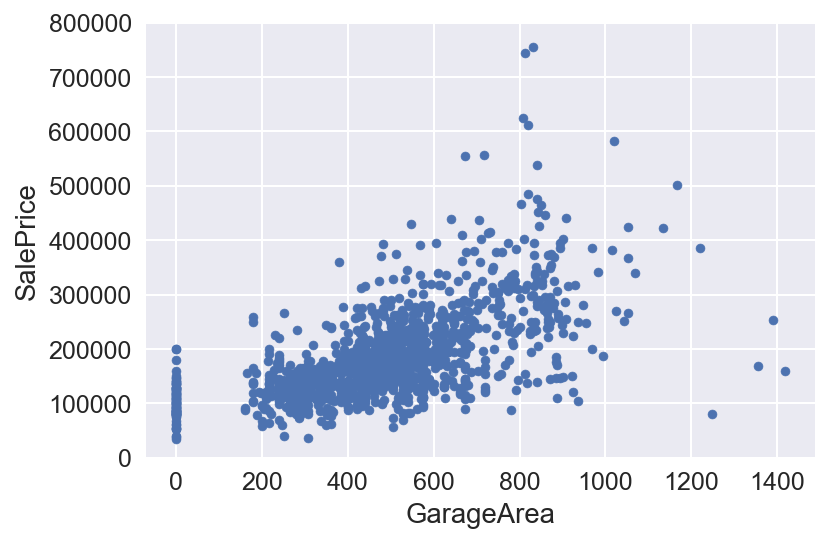

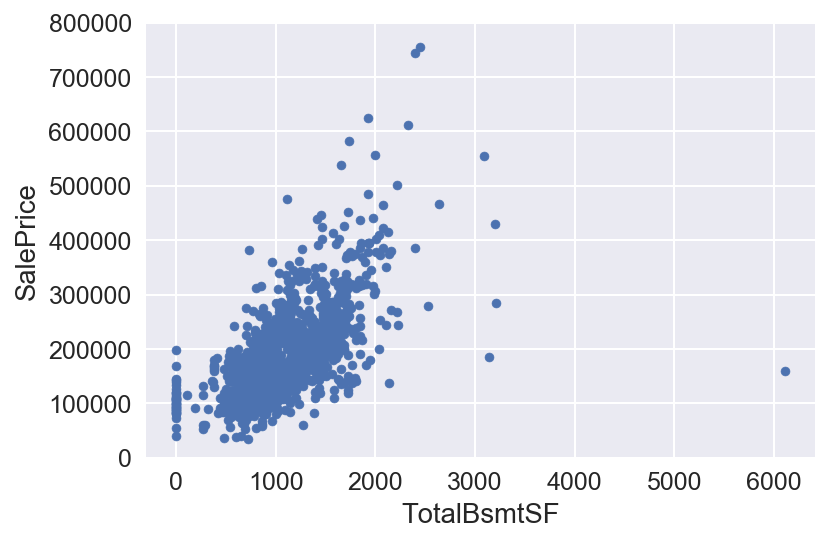

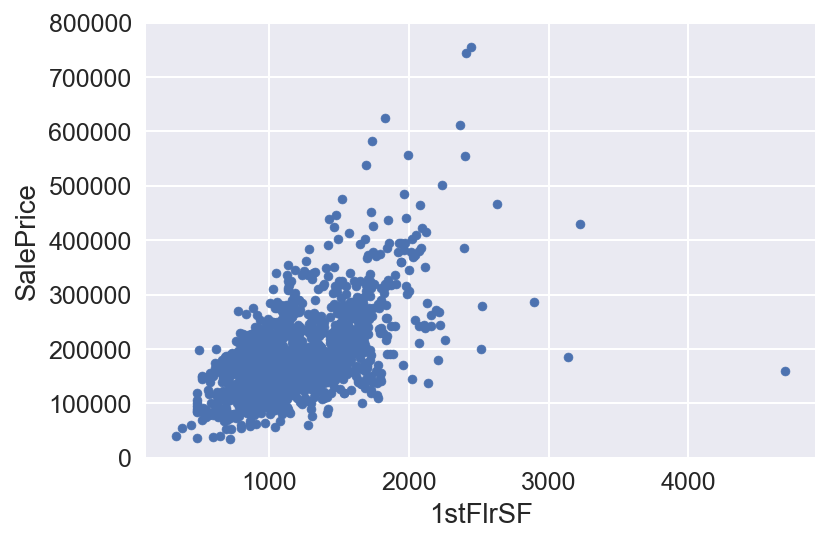

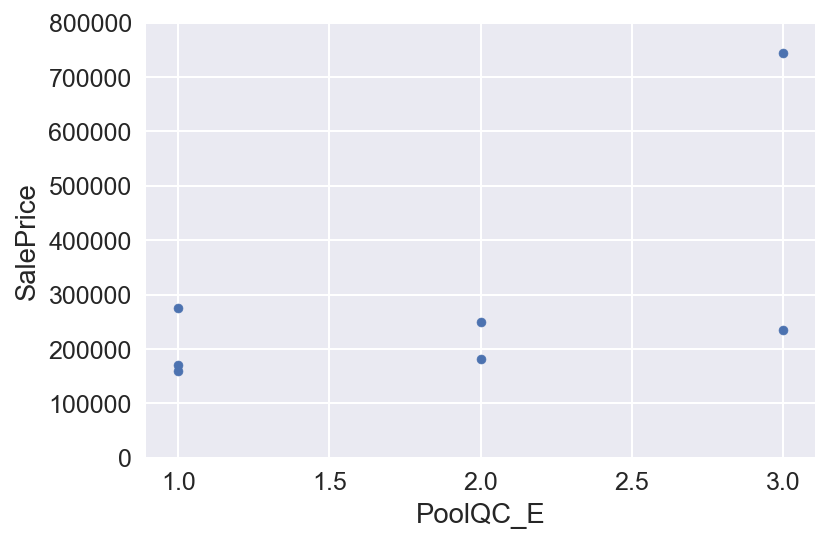

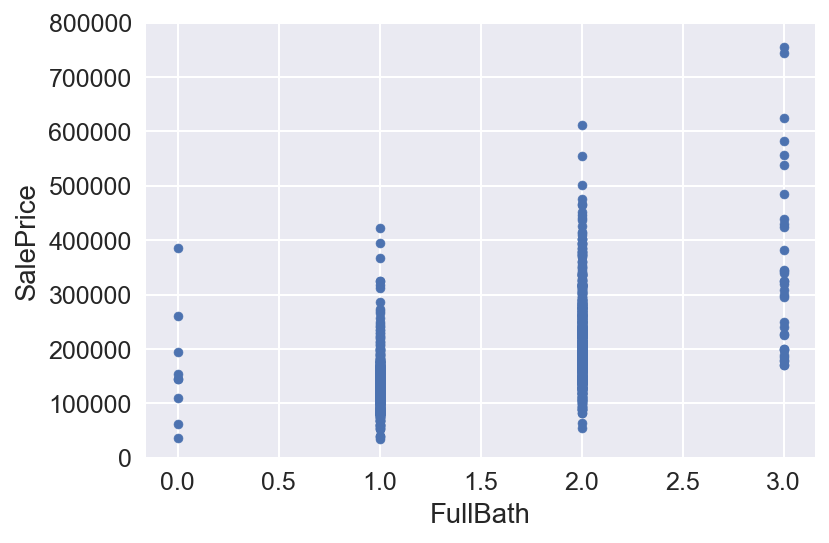

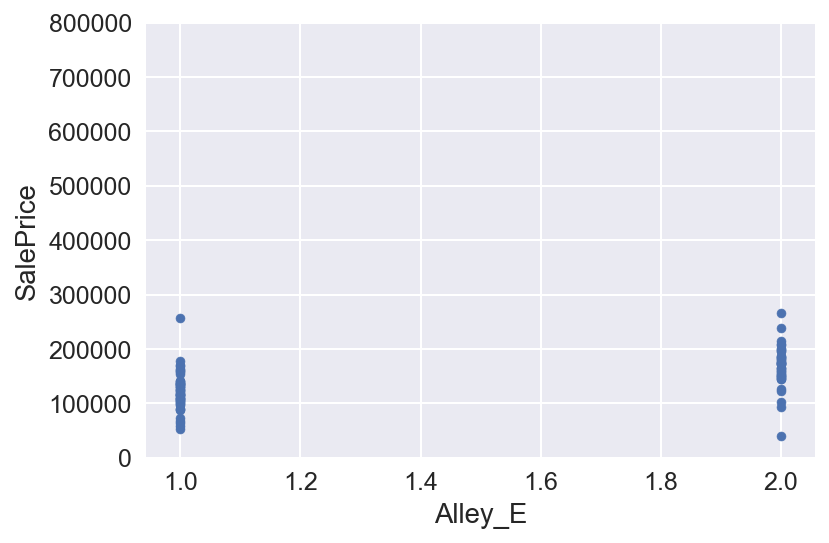

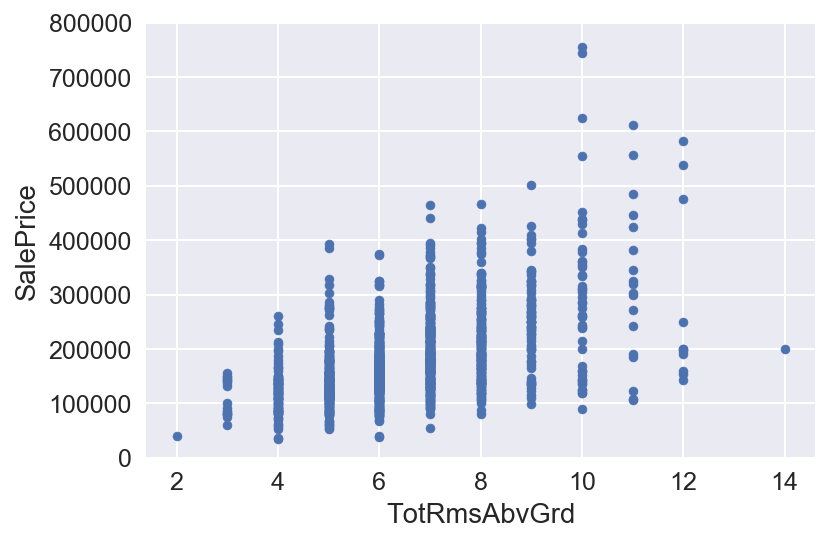

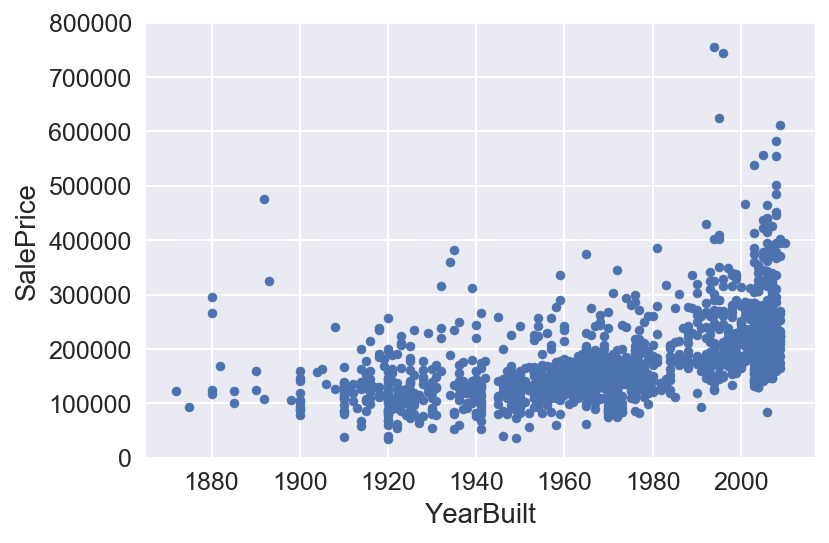

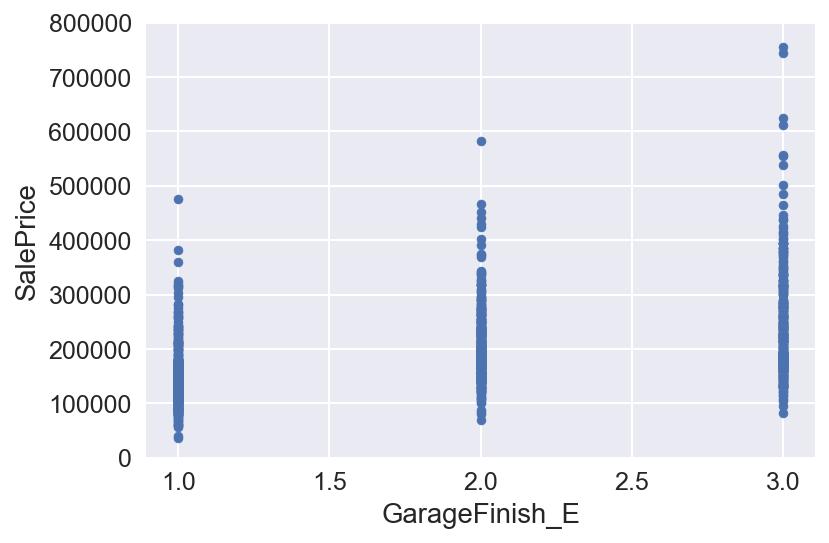

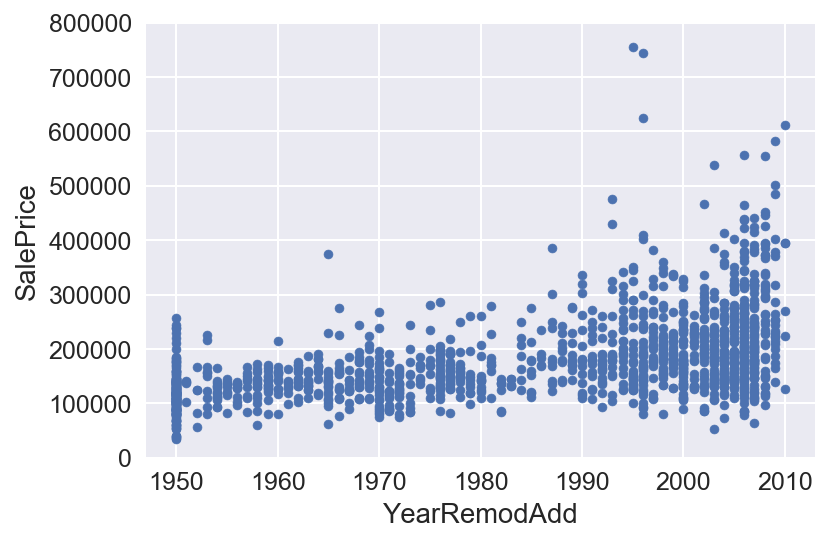

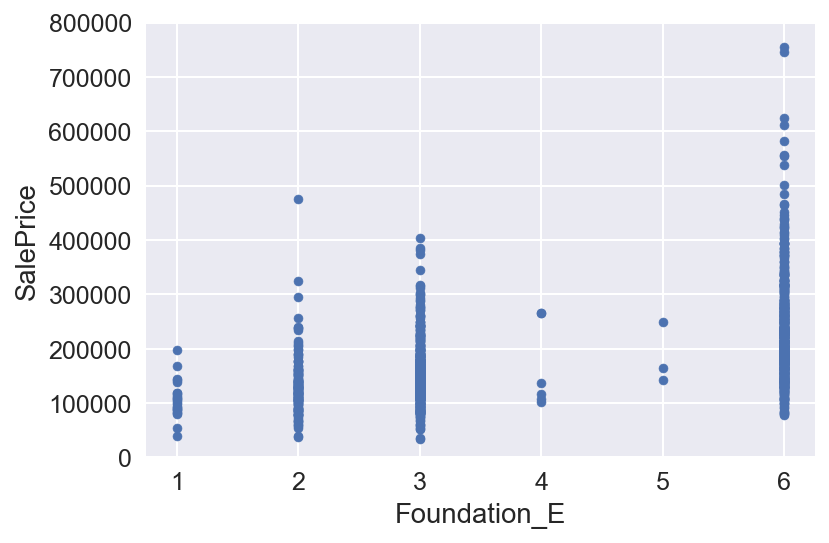

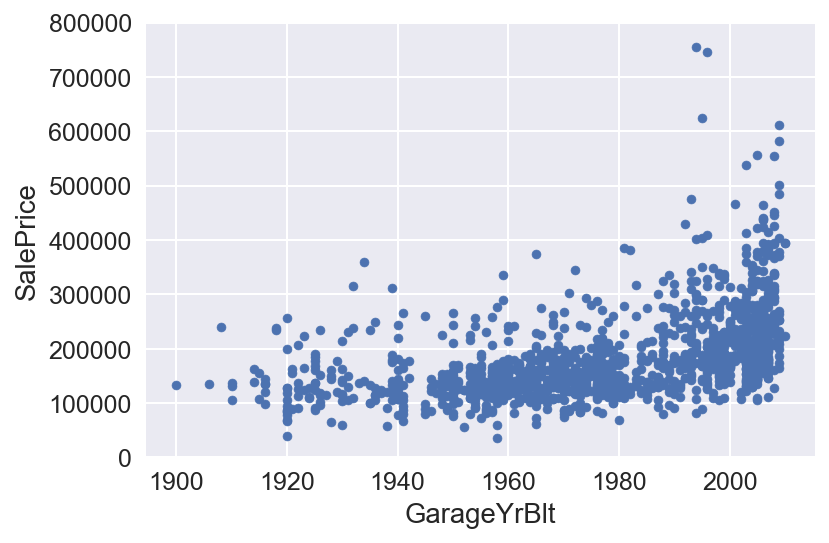

In [35]:
for c in cols:
    data = pd.concat([train['SalePrice'], train[c]],axis=1)
    data.plot.scatter(x=c, y='SalePrice',ylim=(0,800000));

In [36]:
# all_data[(all_data['GarageCars']==4) & (all_data['SalePrice'] < 300000)]

In [37]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

NameError: name 'norm' is not defined

In [ ]:
from scipy import stats
from scipy.stats import norm, skew

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(30)

In [ ]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [ ]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop('SalePrice', axis=1, inplace=True)
all_data.drop('Id', axis=1, inplace=True)

In [ ]:
all_data.shape

In [ ]:
all_data.tail()

In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1,keys=['Total','Percent'])
missing_data.head(50)

In [ ]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

all_data["Alley"] = all_data["Alley"].fillna("None")

all_data["Fence"] = all_data["Fence"].fillna("None")

all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data = all_data.drop(['Utilities'], axis=1)

all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [ ]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1,keys=['Total','Percent'])
missing_data.head(10)

In [ ]:
all_data.shape

In [ ]:
X_train = all_data[:train.shape[0]]
X_train.shape

In [ ]:
X_test = all_data[train.shape[0]:]
X_test.shape

In [ ]:
y = train.SalePrice
y.shape